In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('marketing_data.csv')

In [6]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [7]:
data.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND
2239,4070,1969,PhD,Married,"$94,871.00",0,2,9/1/12,99,169,...,4,7,0,1,1,0,0,1,0,CA


In [8]:
data.shape

(2240, 28)

In [9]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [10]:
data.duplicated().sum()

0

In [11]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [13]:
data.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
data.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
 Income                1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Response                  2
Complain                  2
Country                   8
dtype: int64

In [21]:
df = data[['Education', 'Marital_Status','Kidhome', 'Teenhome', 'AcceptedCmp3', 'AcceptedCmp2','AcceptedCmp1', 'Response', 'Complain', 'Country' ]]

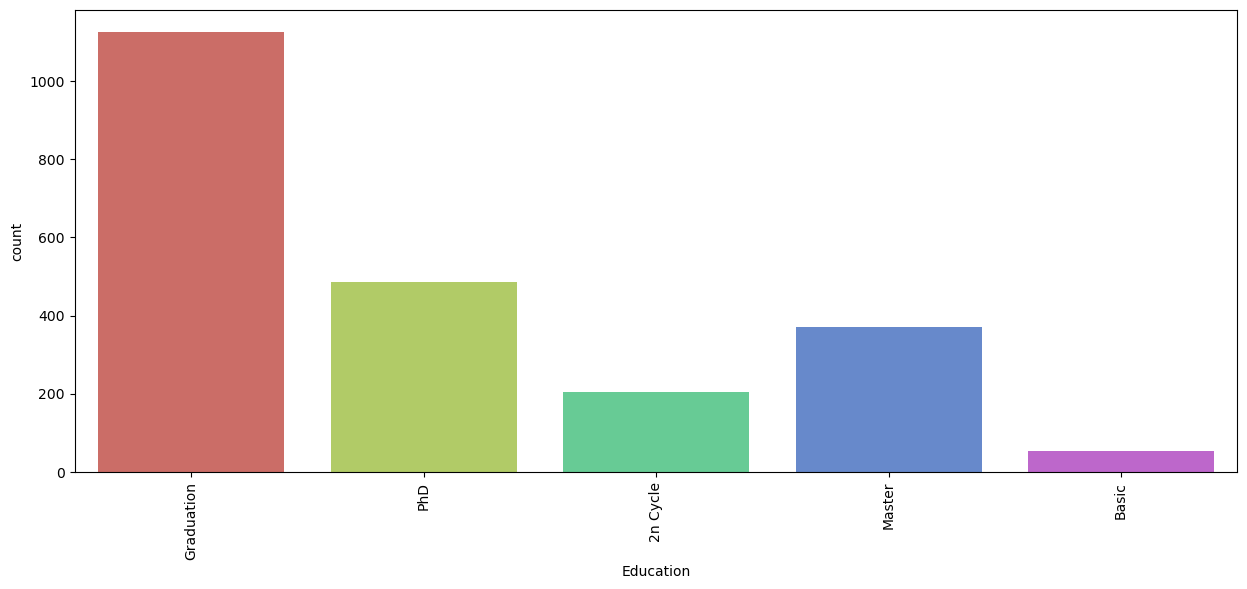

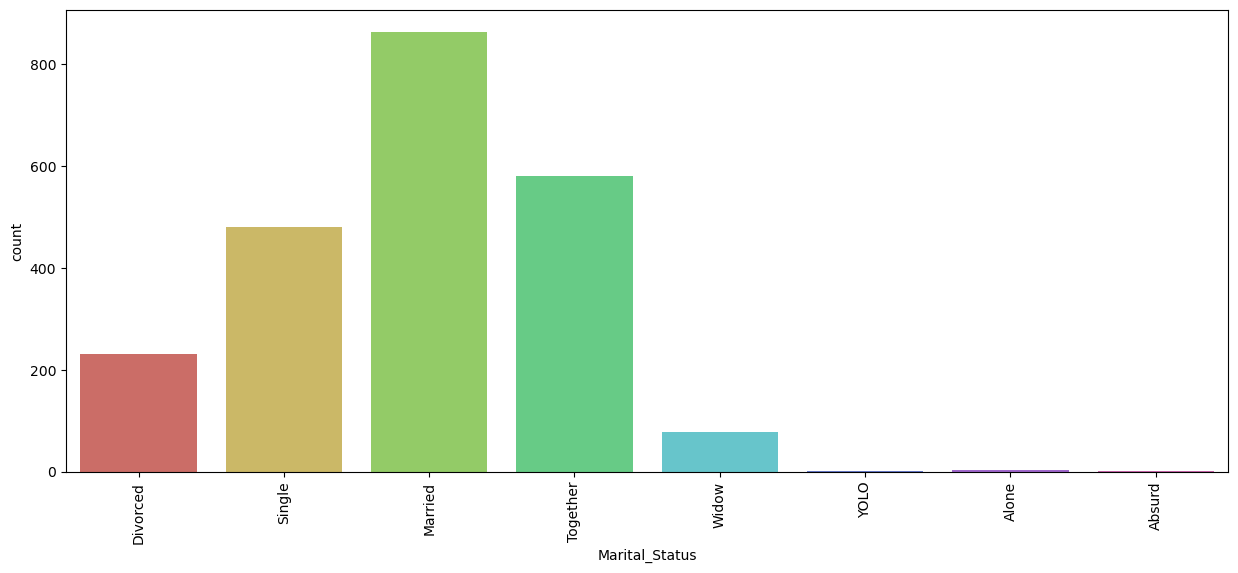

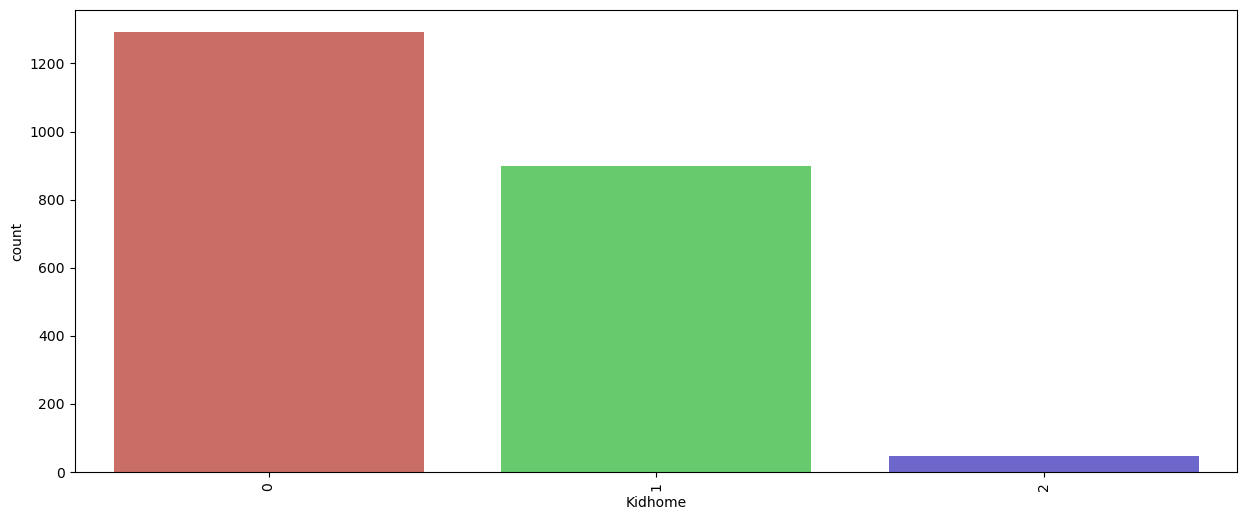

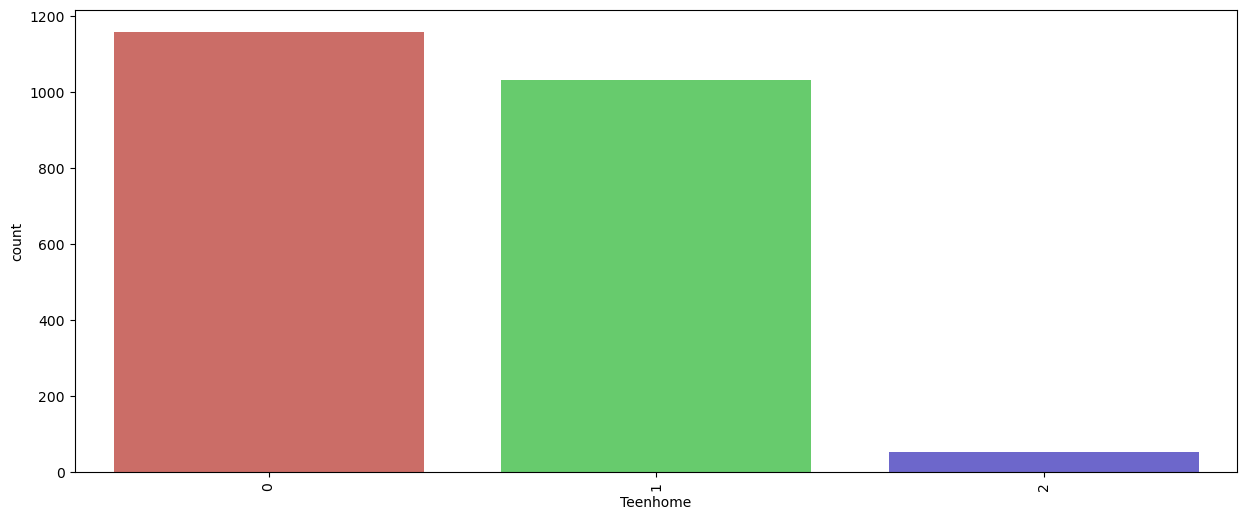

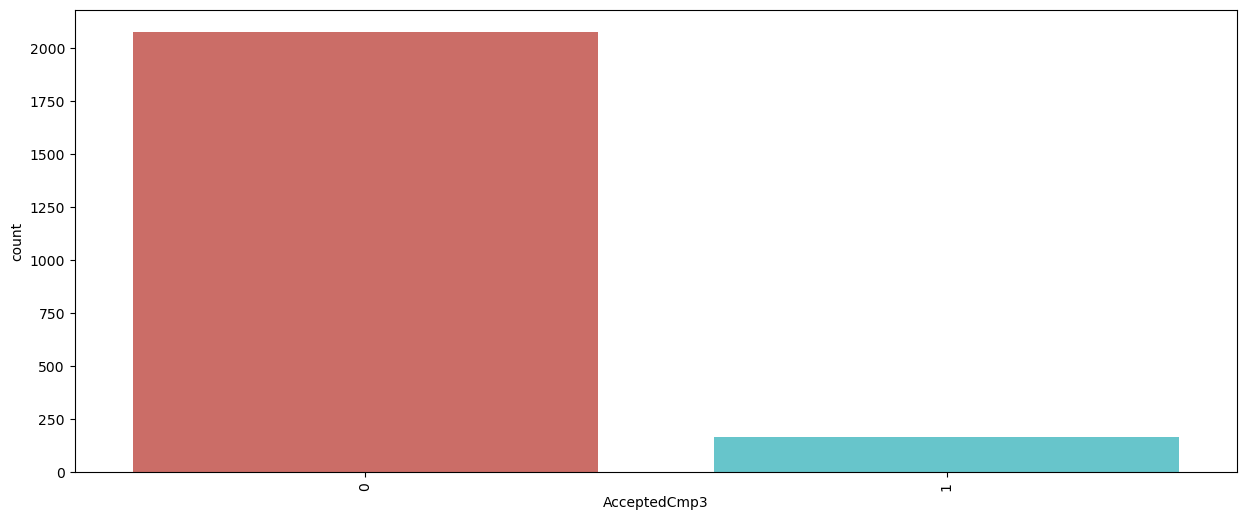

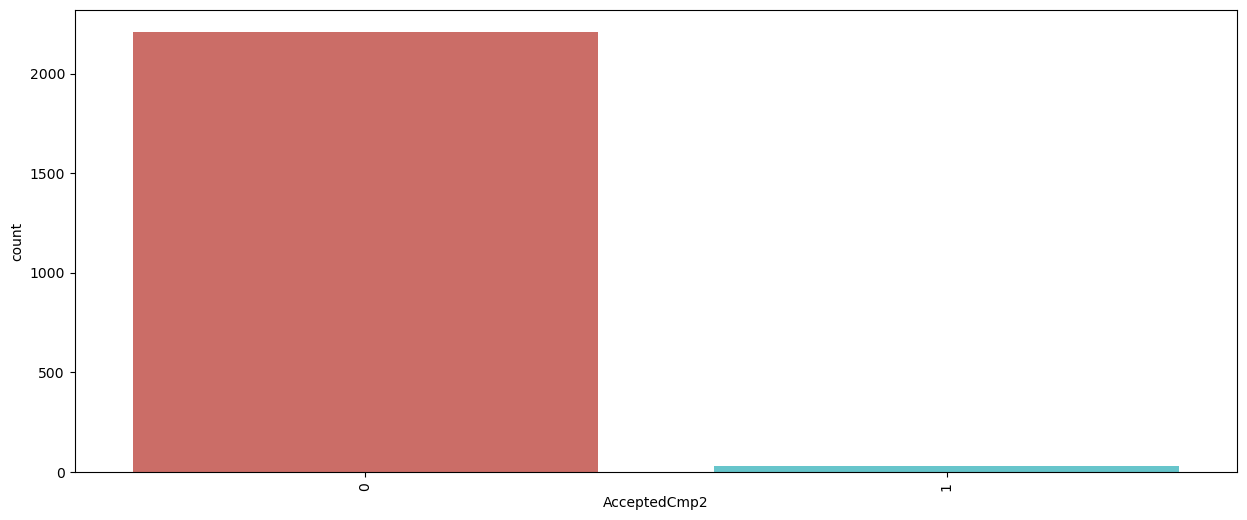

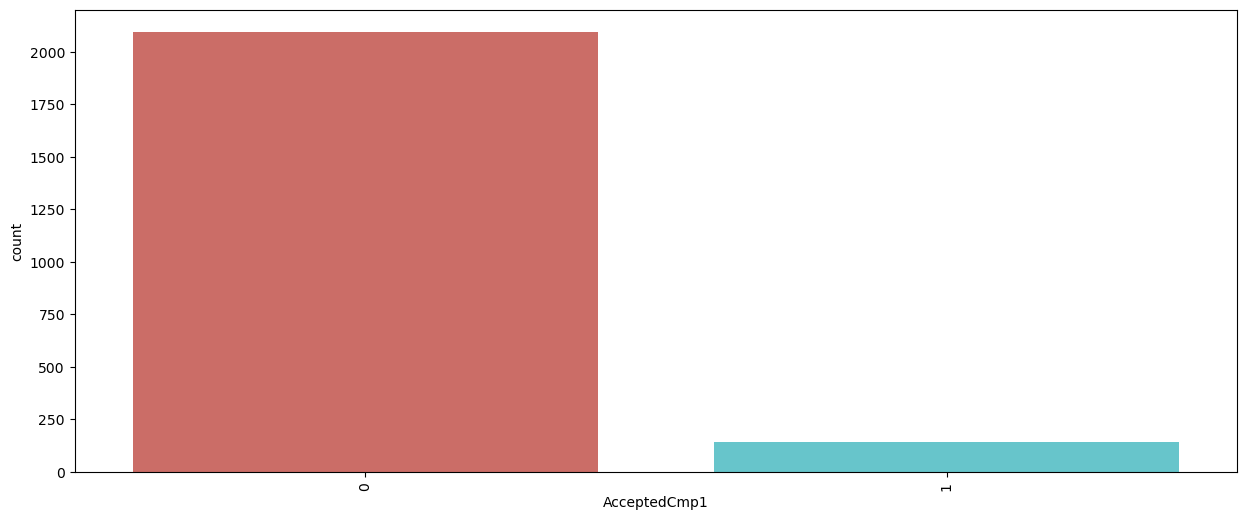

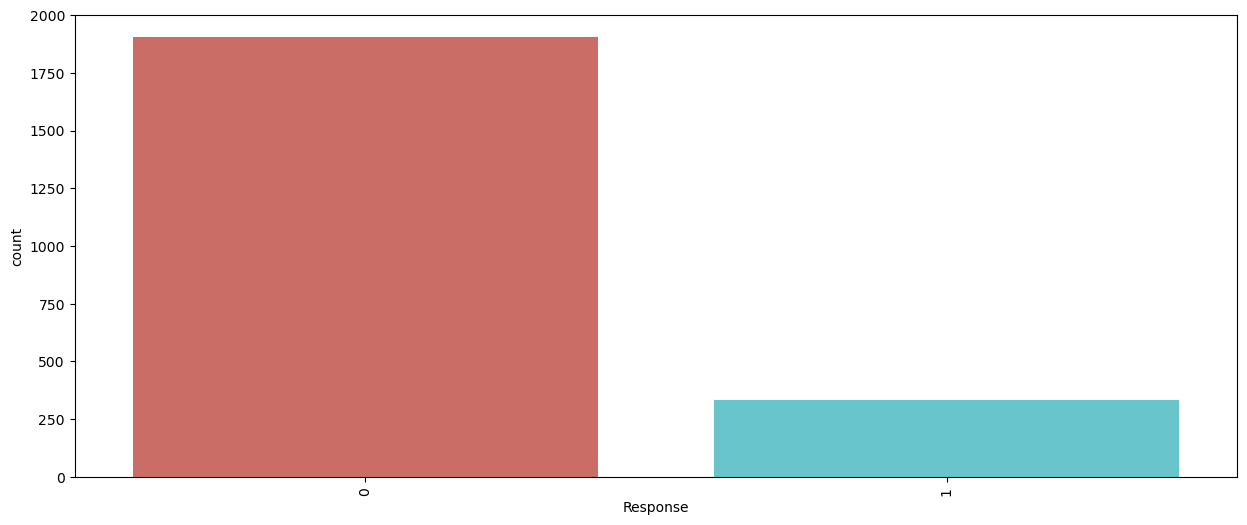

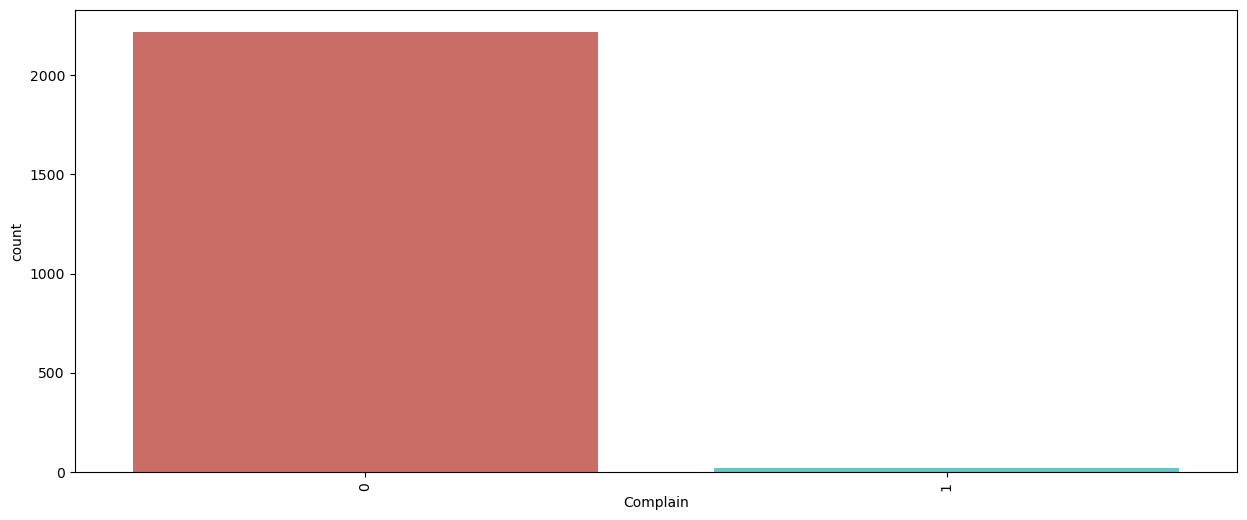

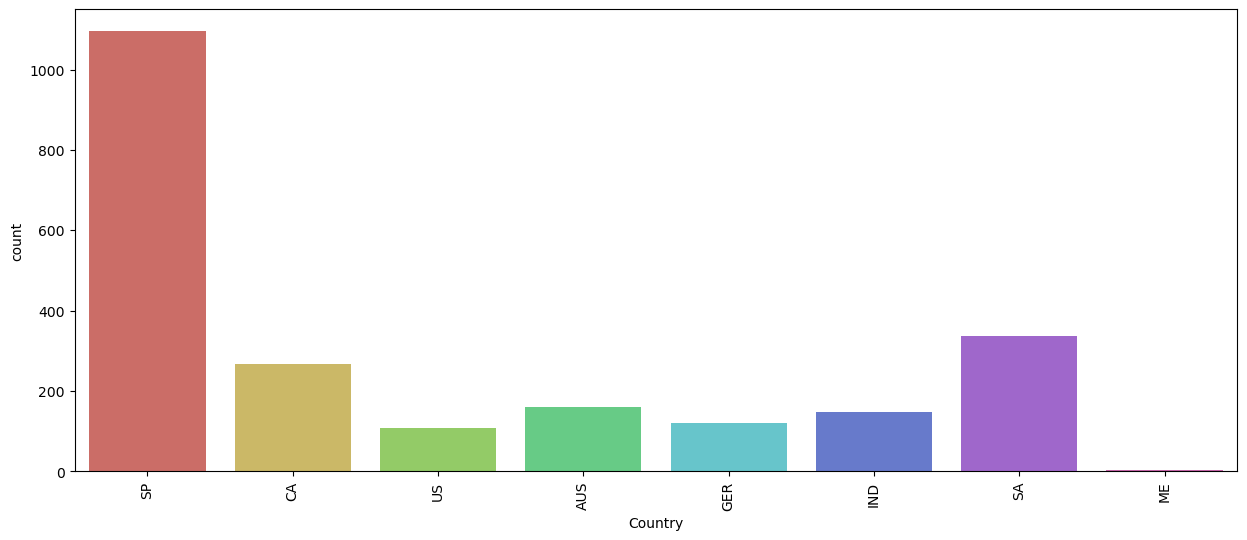

In [17]:
for i in df.columns:
    plt.figure(figsize=(15,6))
    sns.countplot(df[i], data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()
    

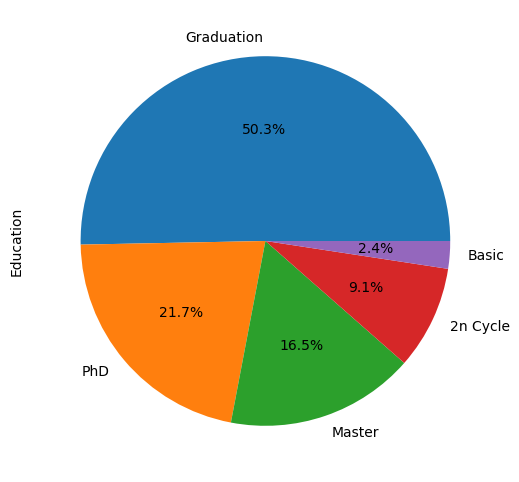

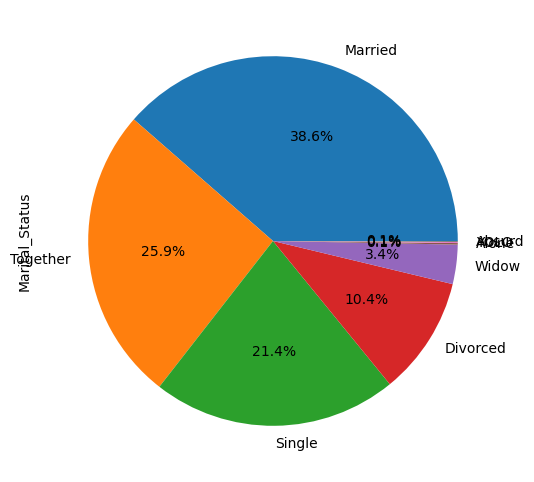

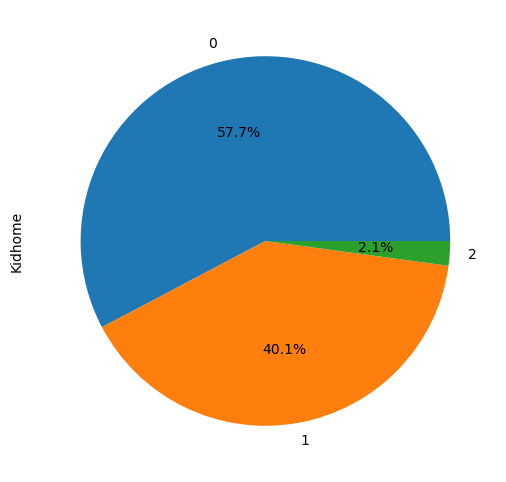

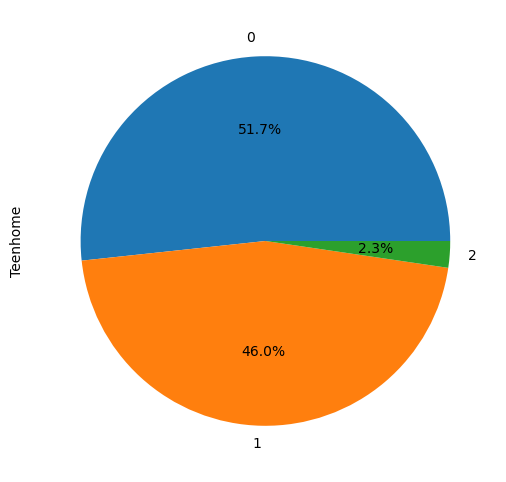

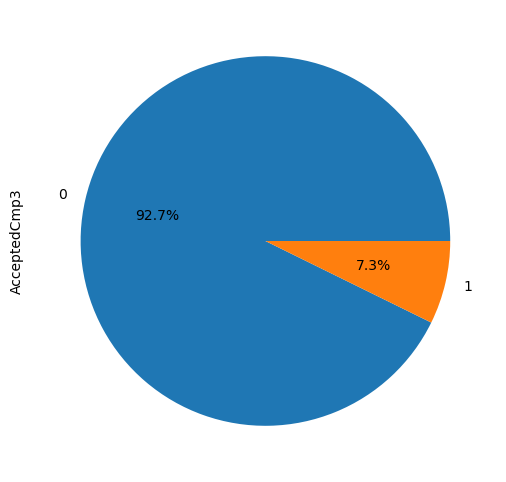

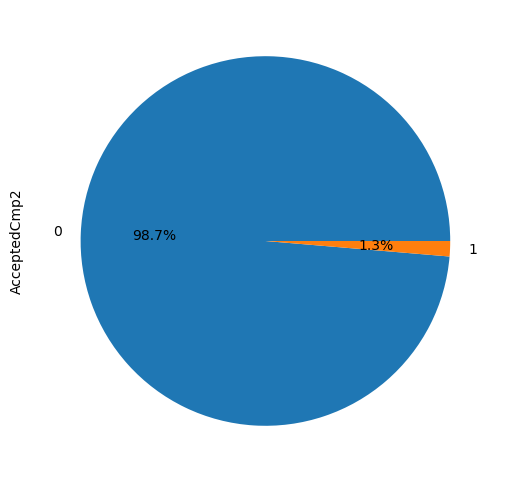

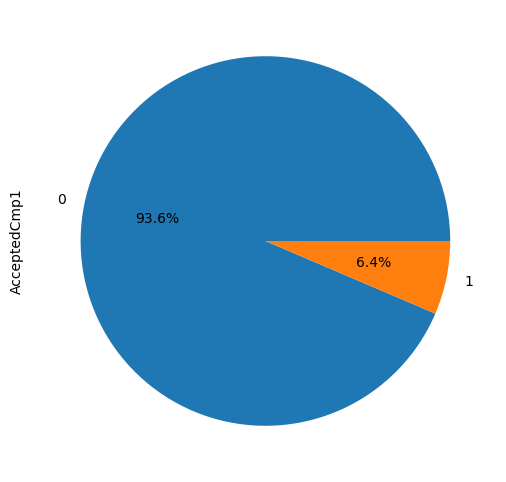

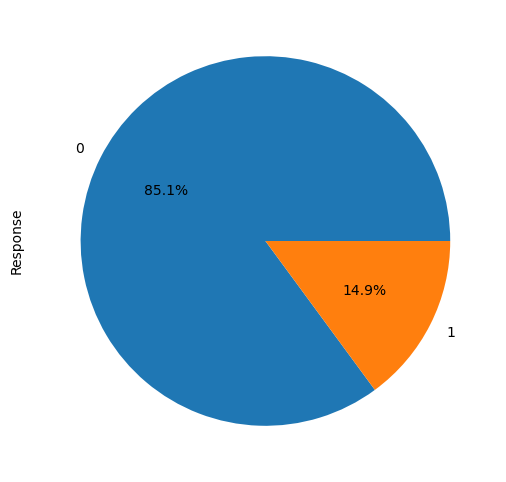

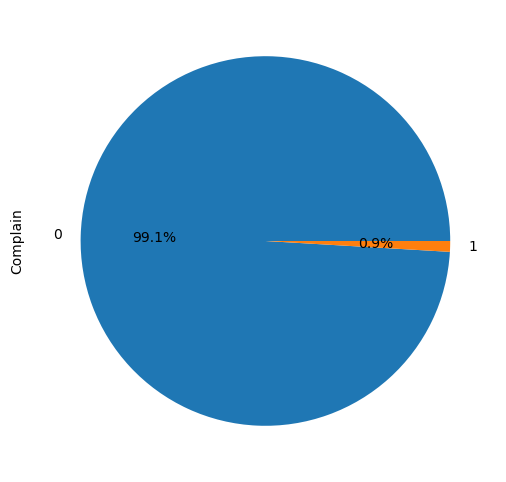

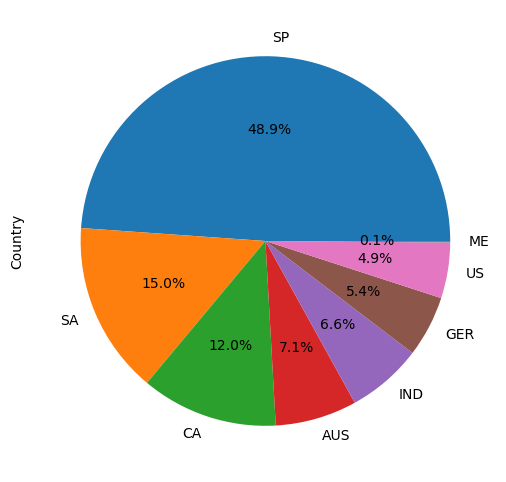

In [19]:
for i in df.columns:
    plt.figure(figsize=(15,6))
    df[i].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.xticks(rotayion=90)
    plt.show()
    

In [23]:
data_num = data[['ID', 'Year_Birth', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain' ]]

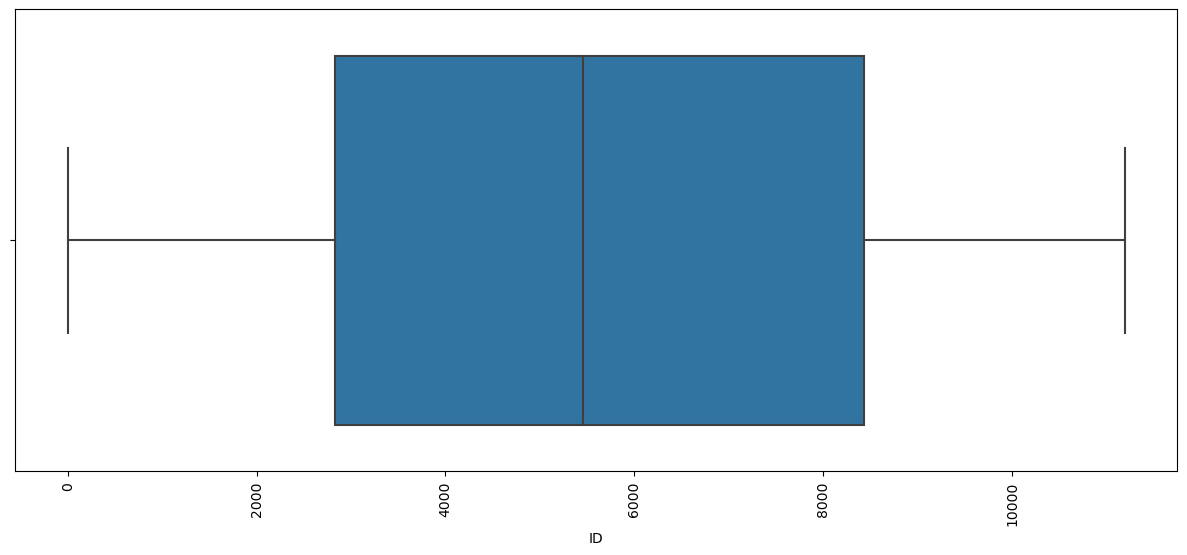

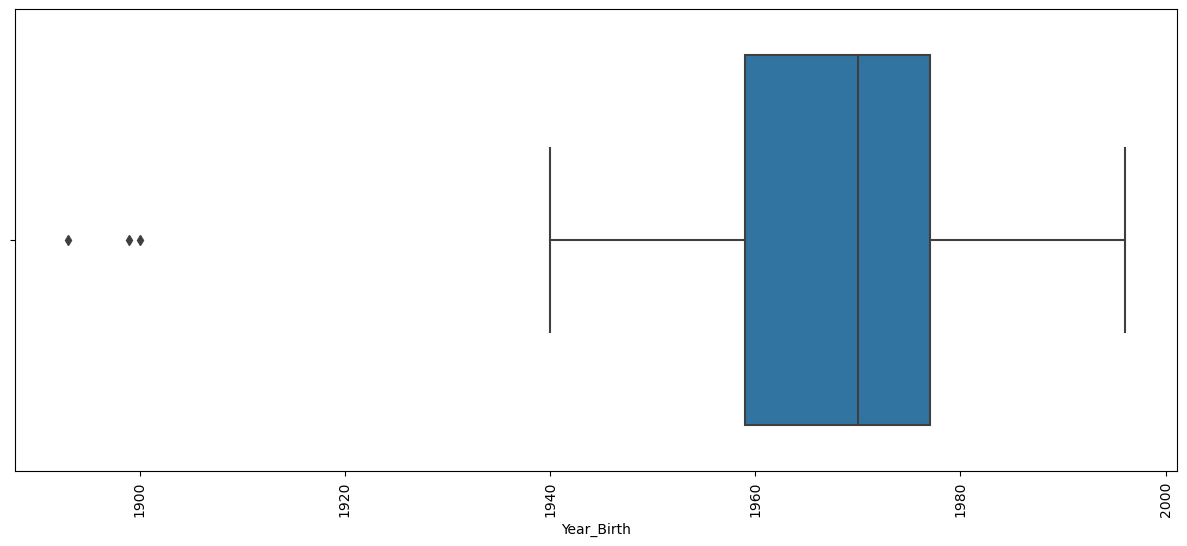

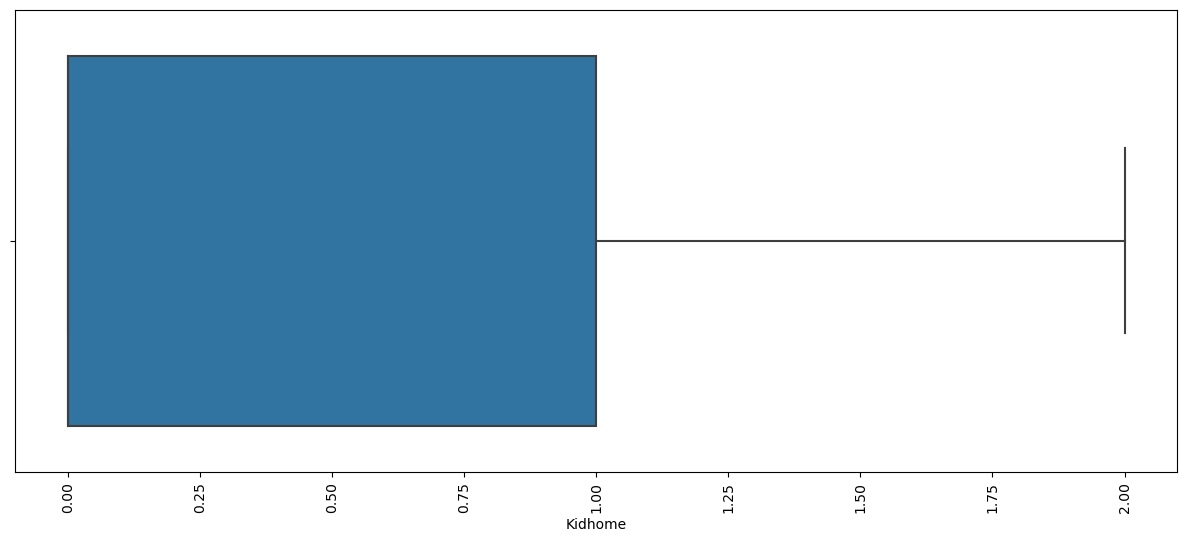

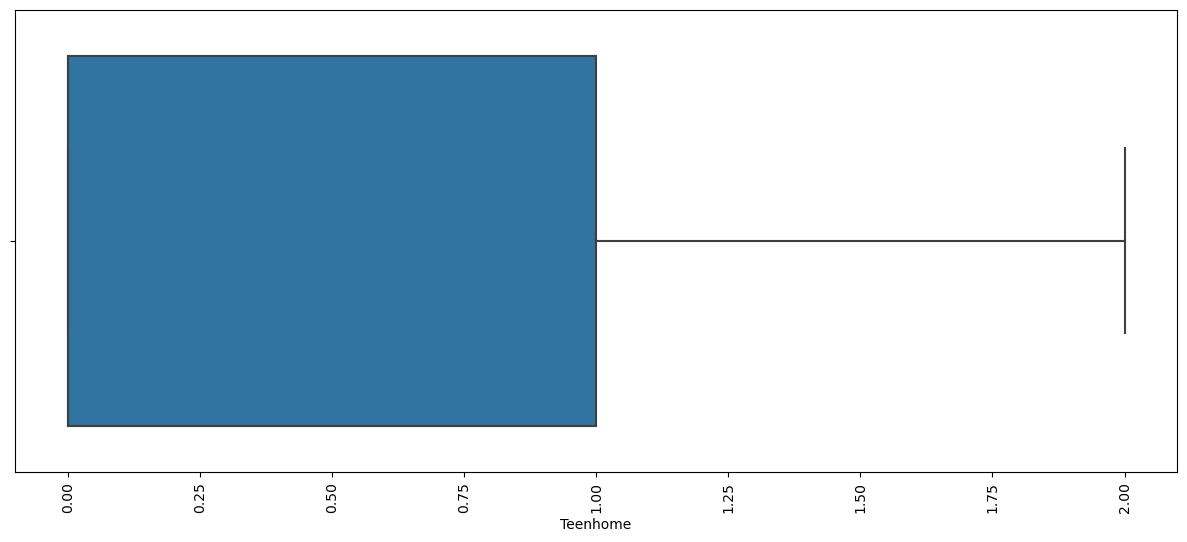

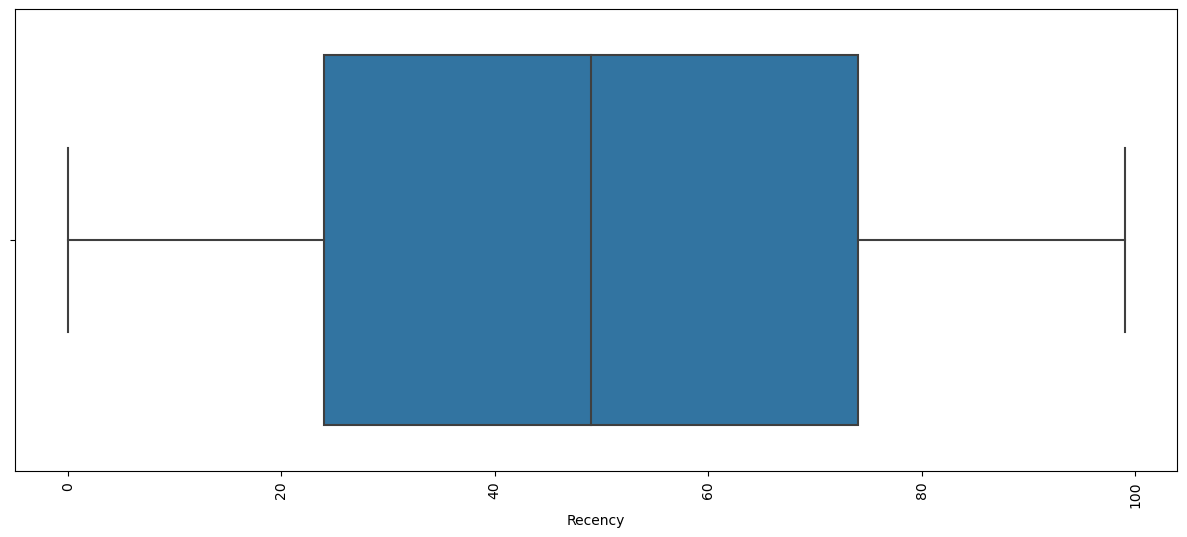

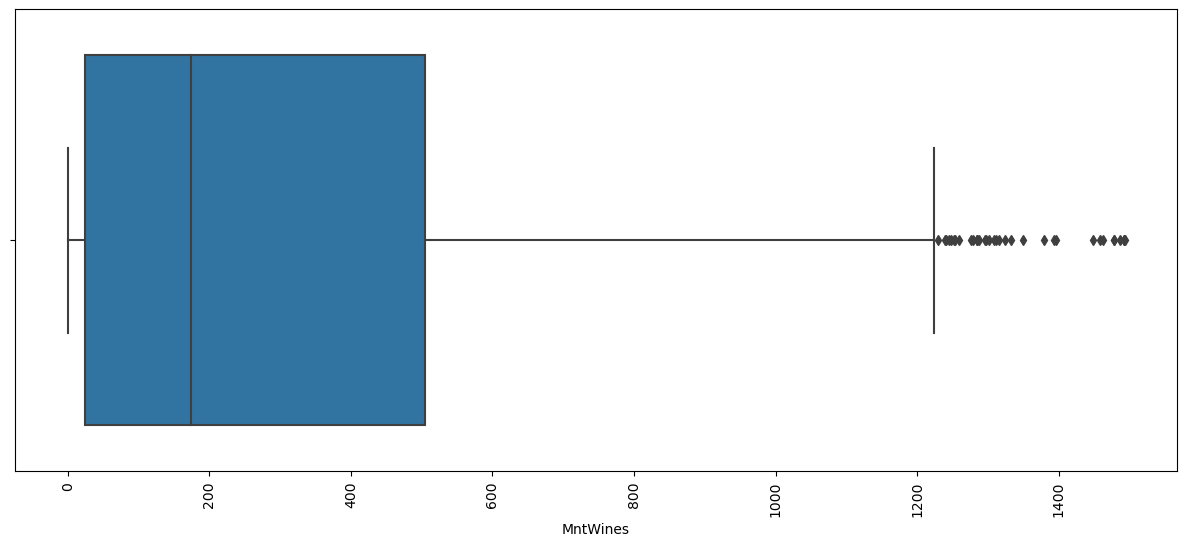

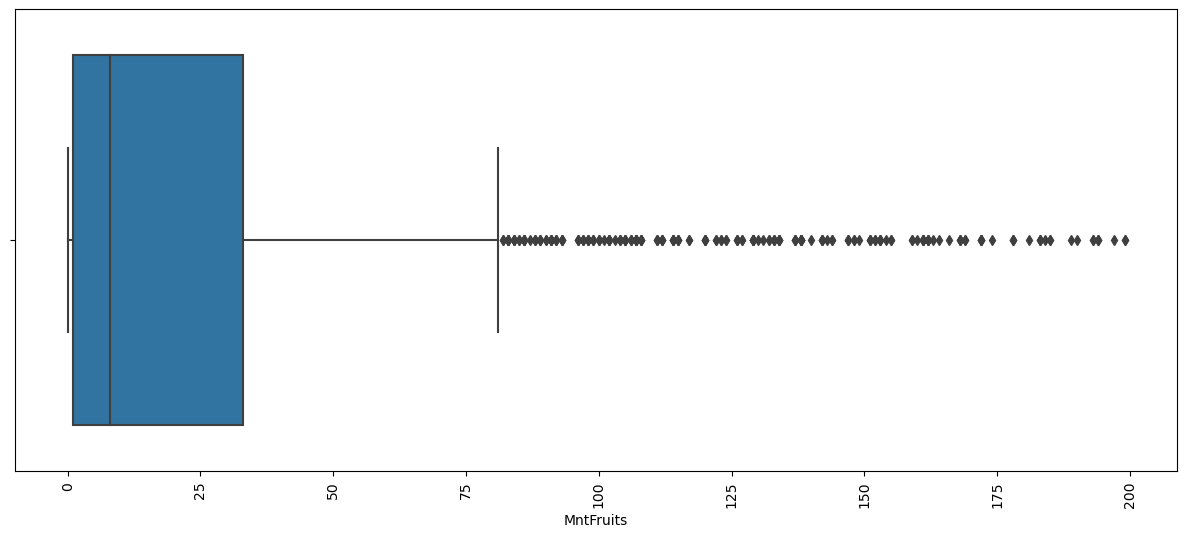

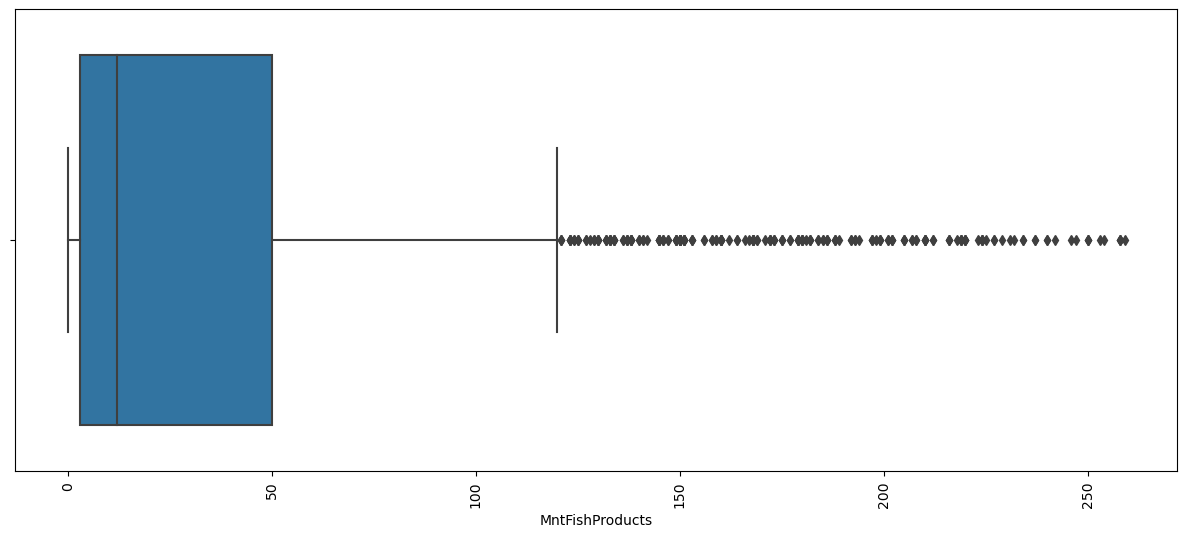

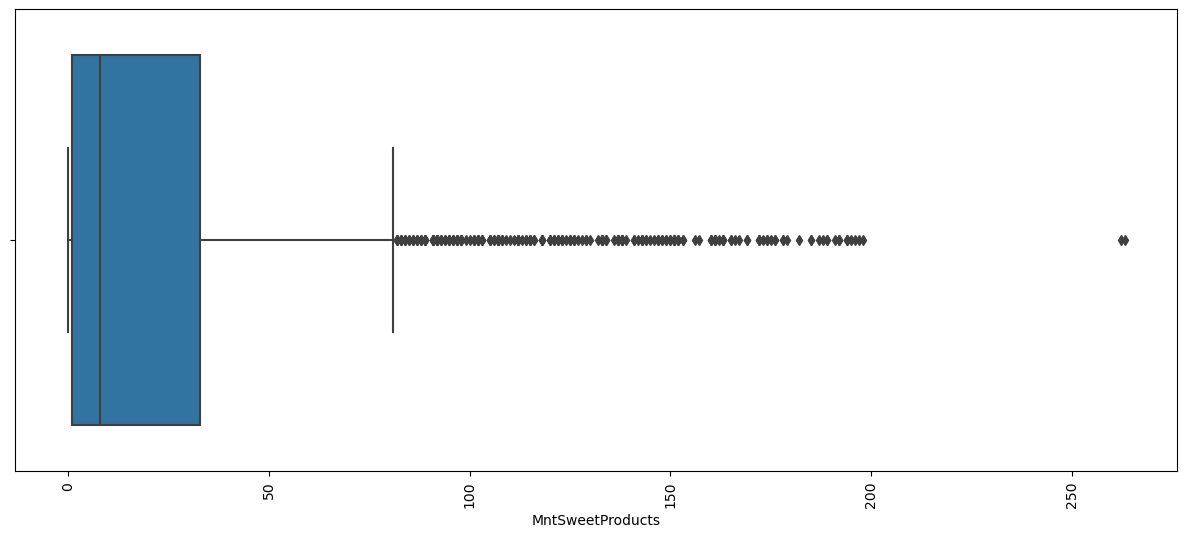

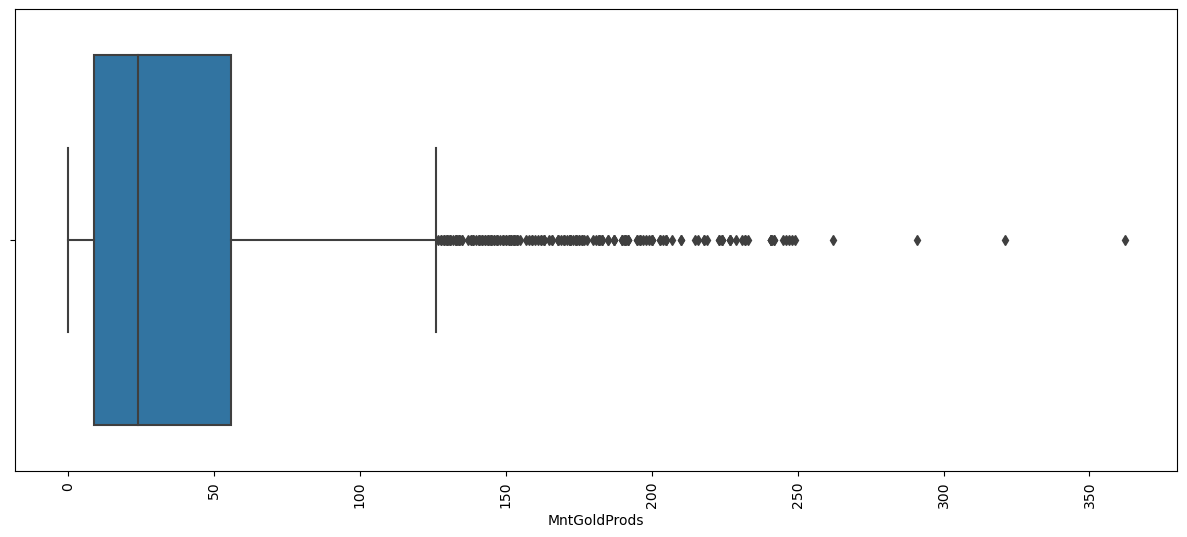

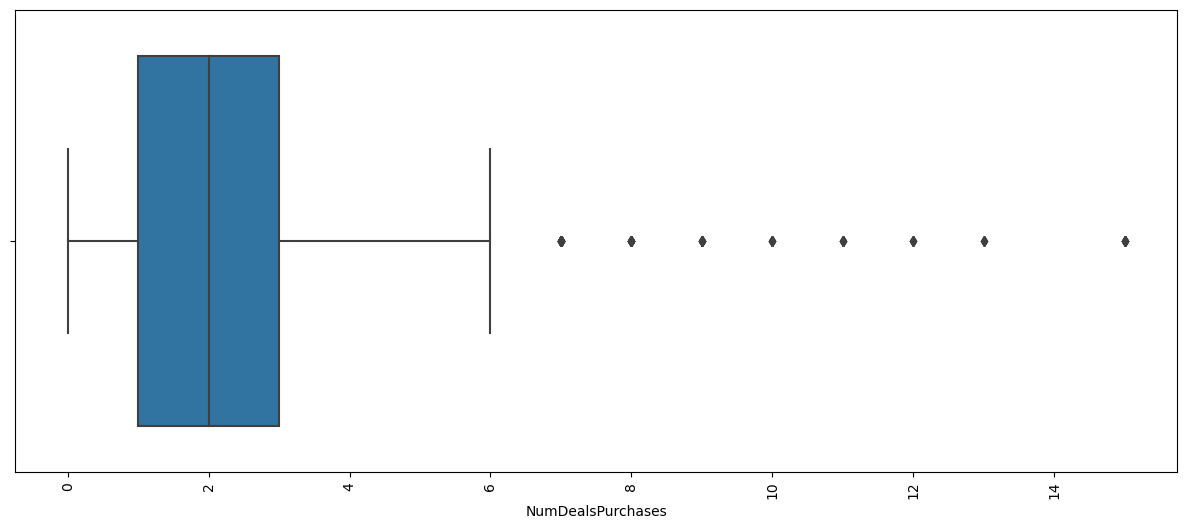

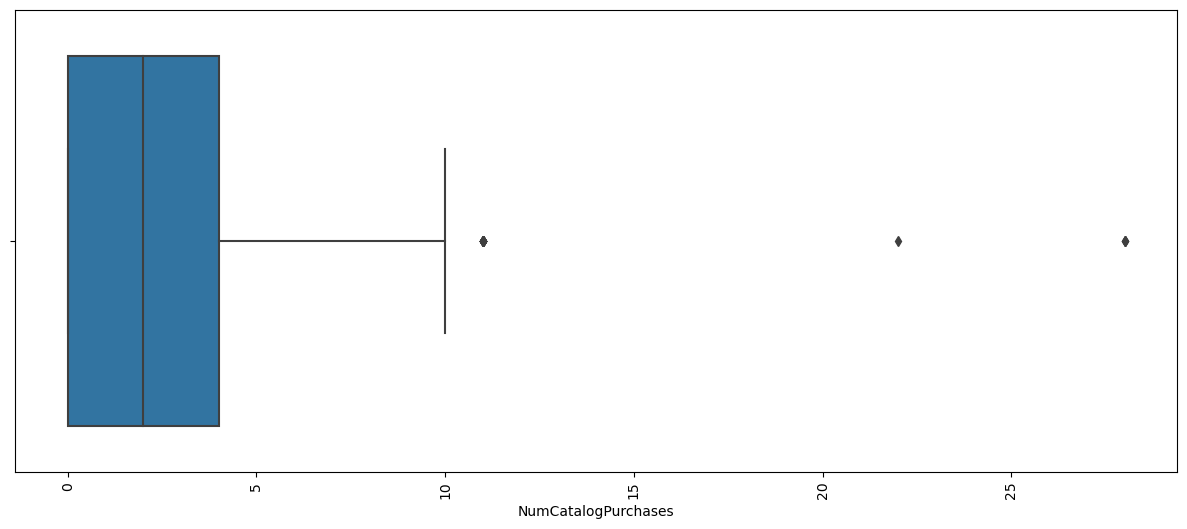

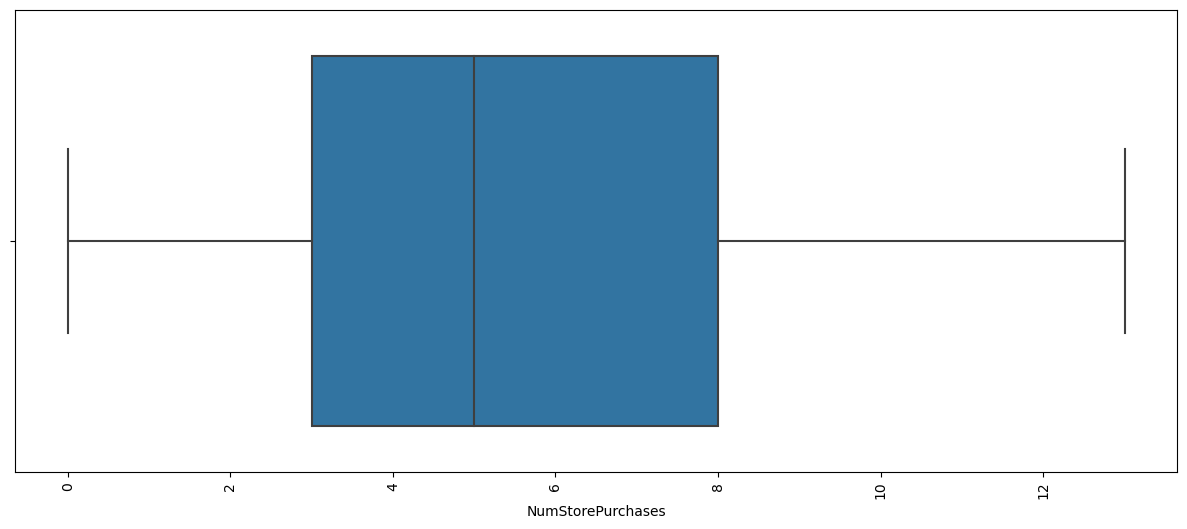

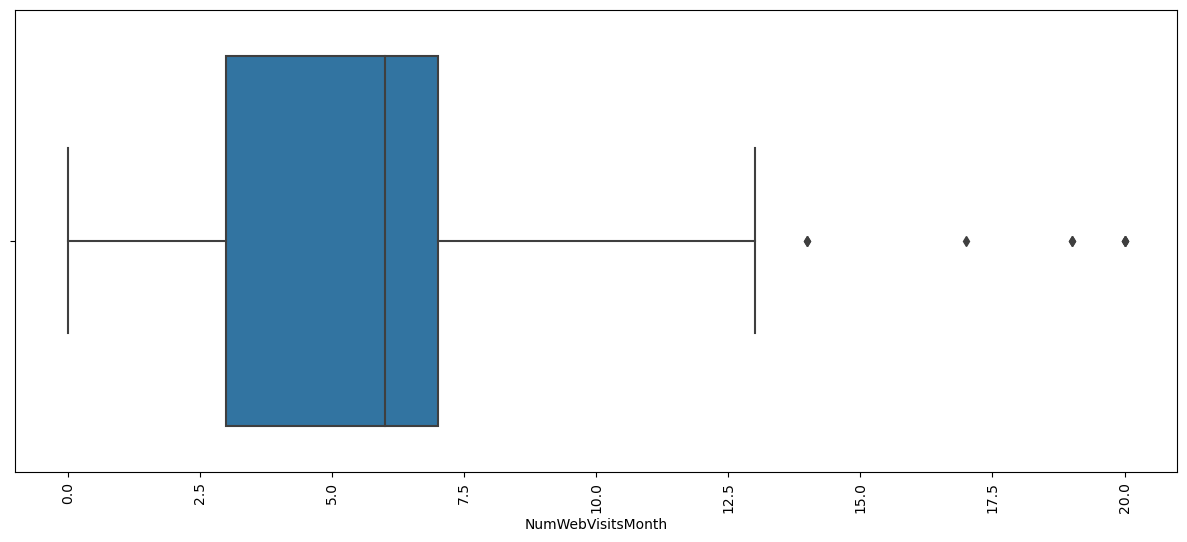

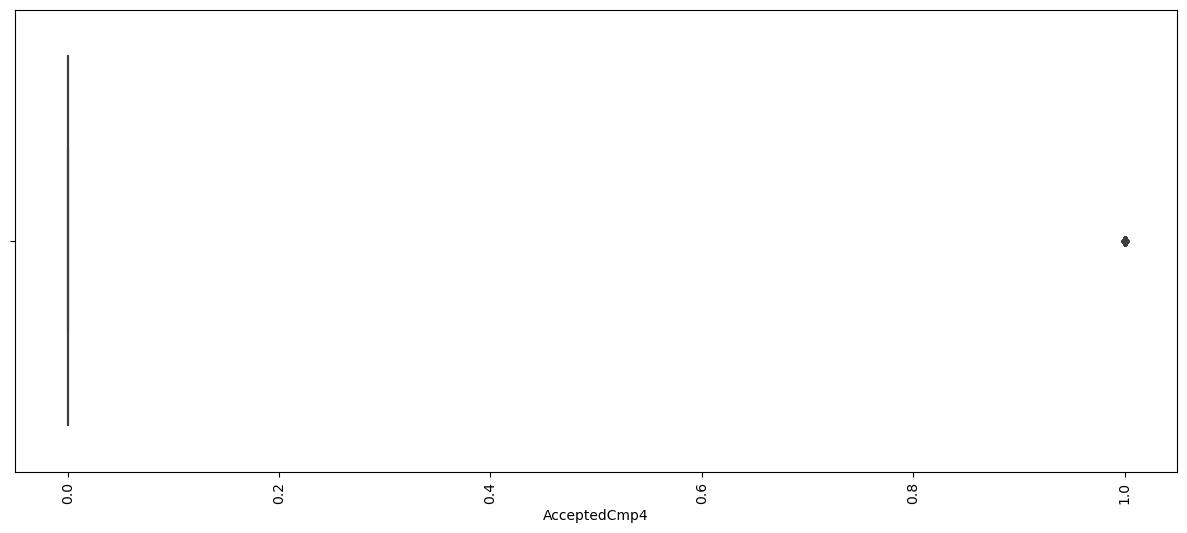

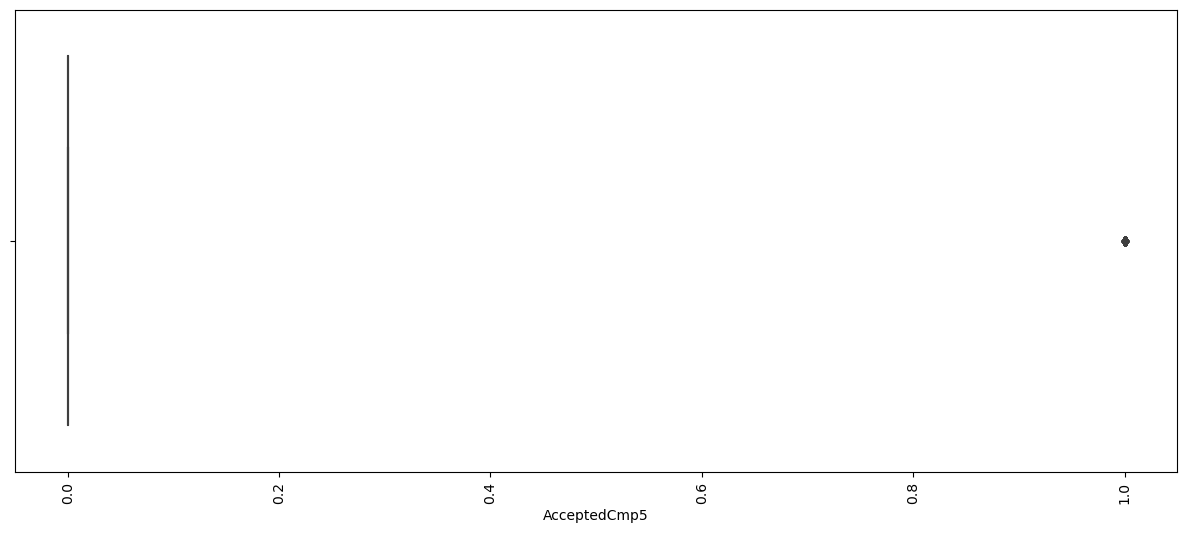

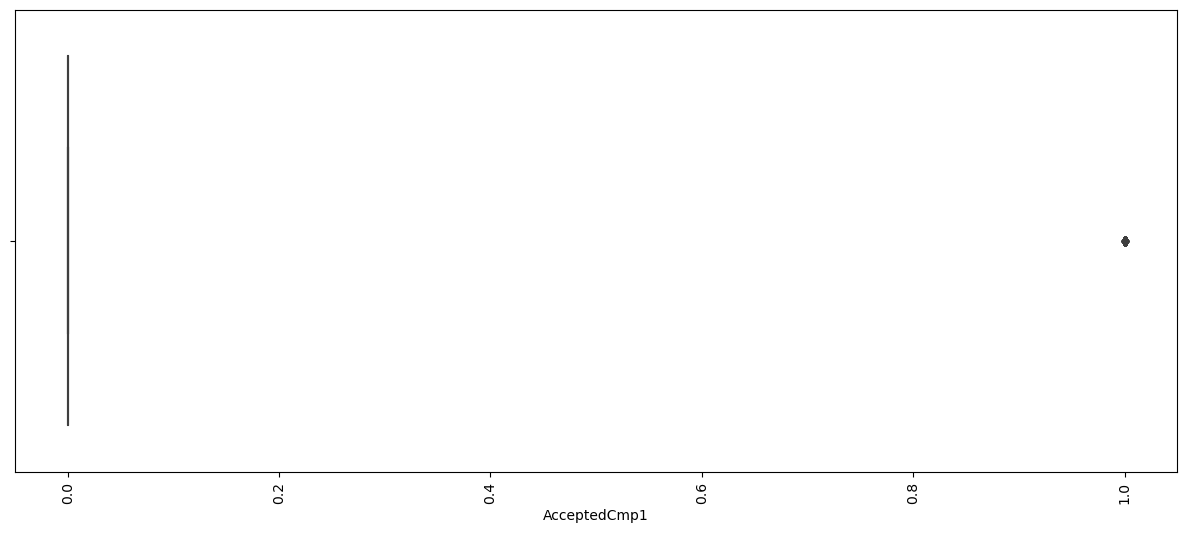

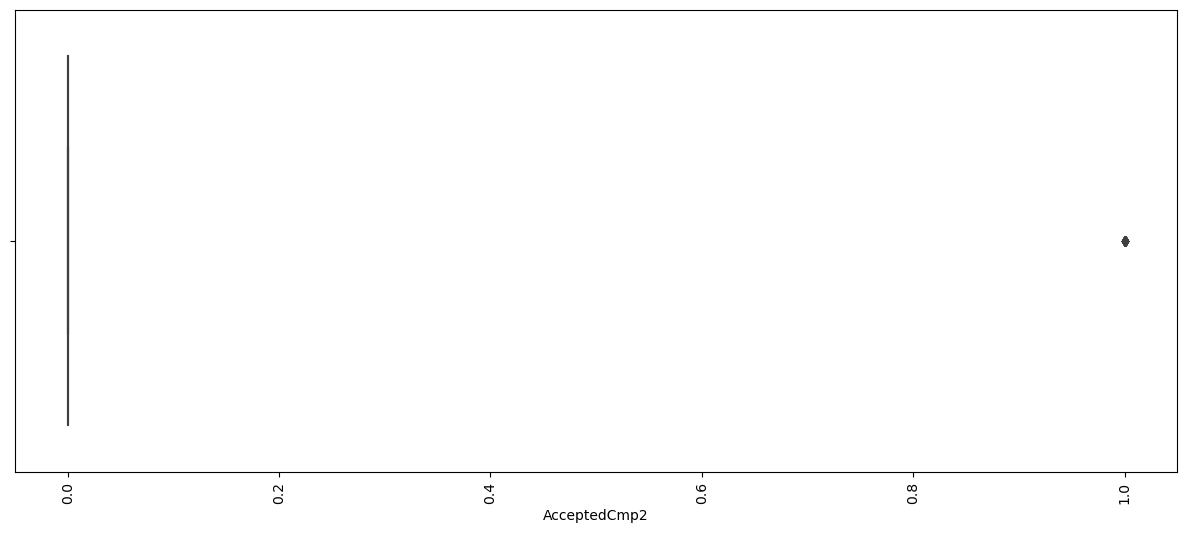

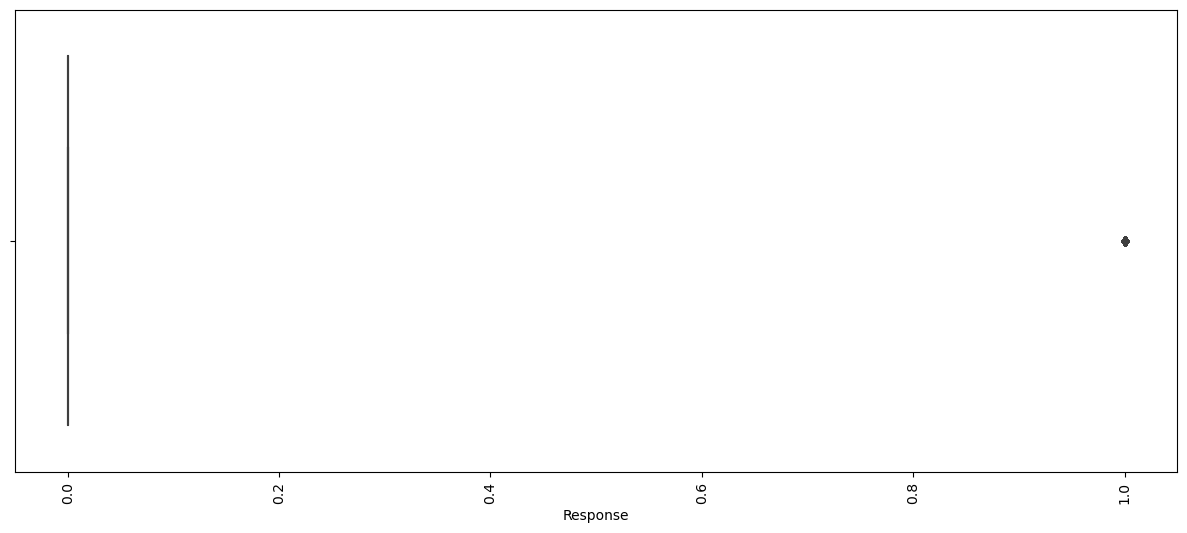

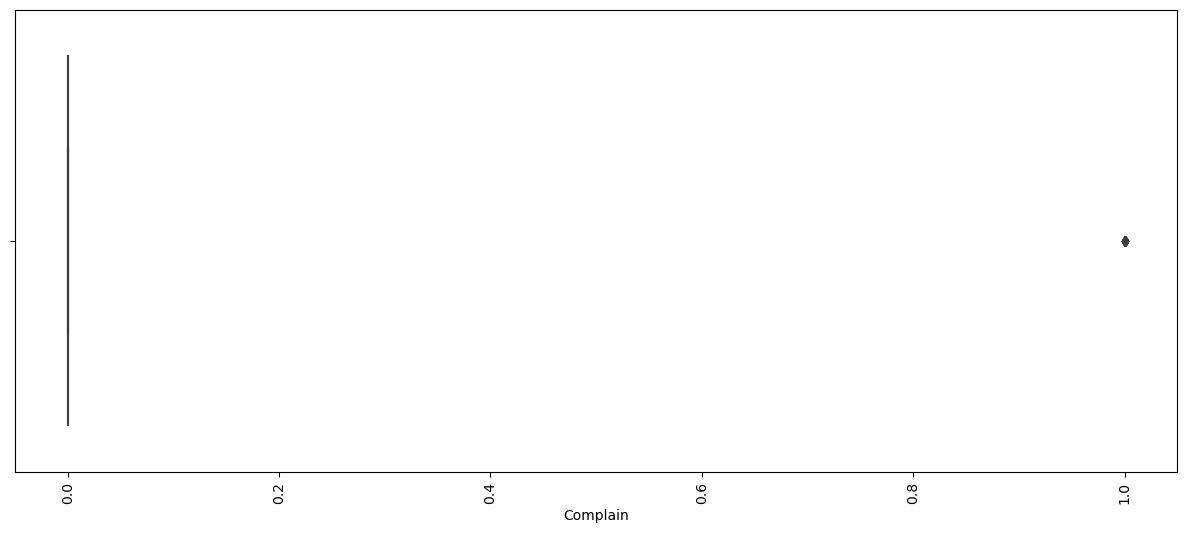

In [25]:
for i in data_num.columns:
    plt.figure(figsize=(15, 6))
    sns.boxplot(data_num[i])
    plt.xticks(rotation=90)
    plt.show()

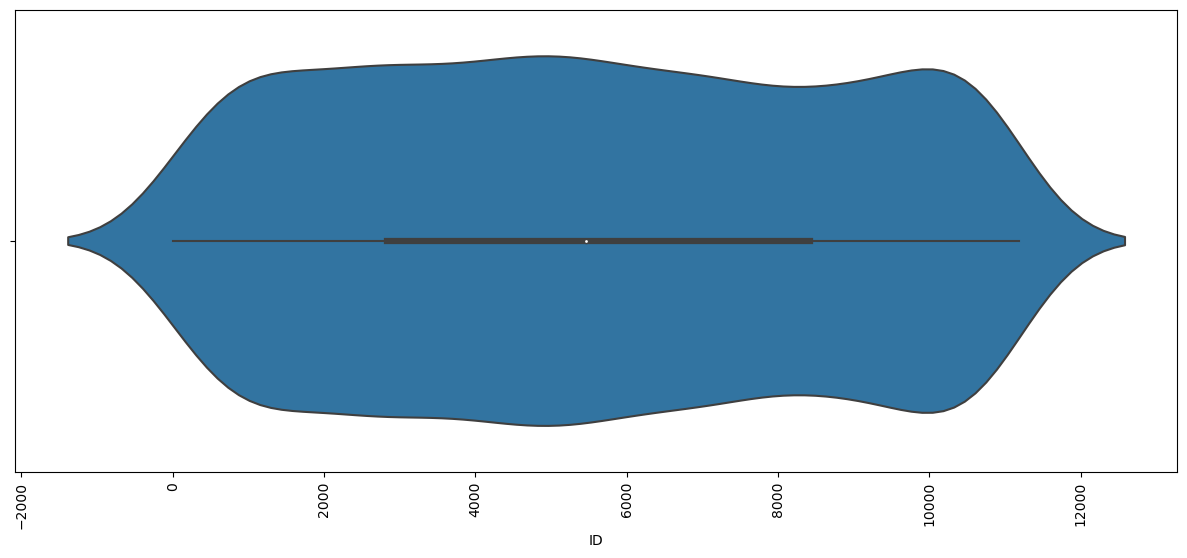

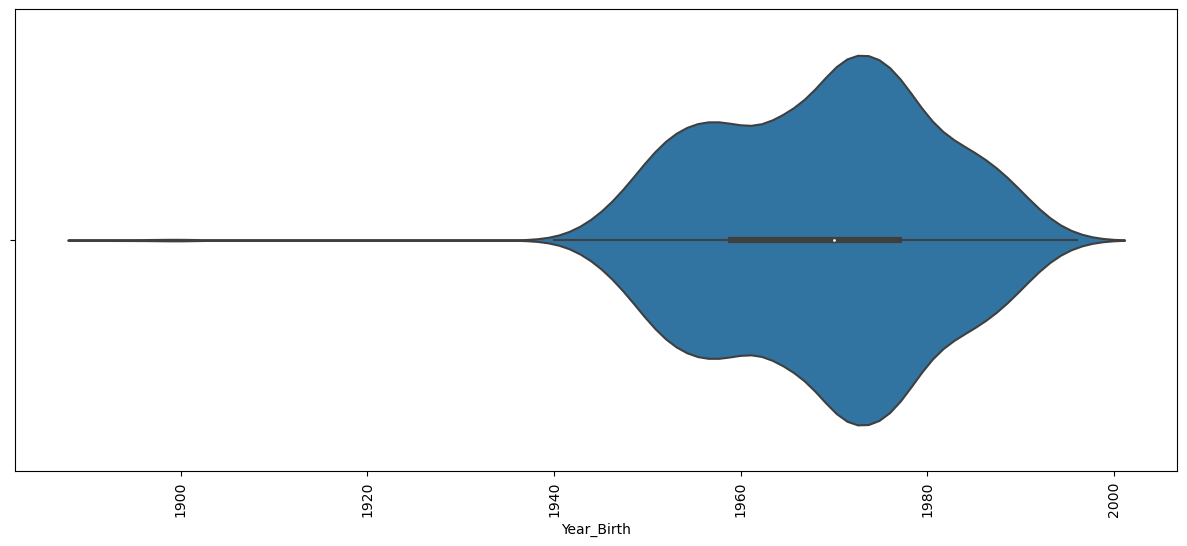

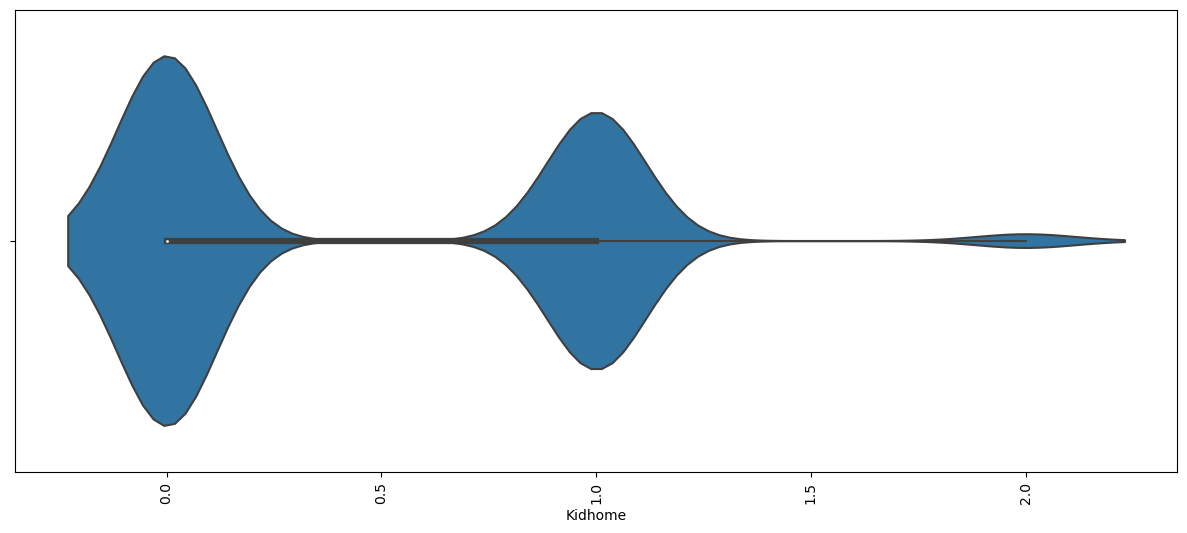

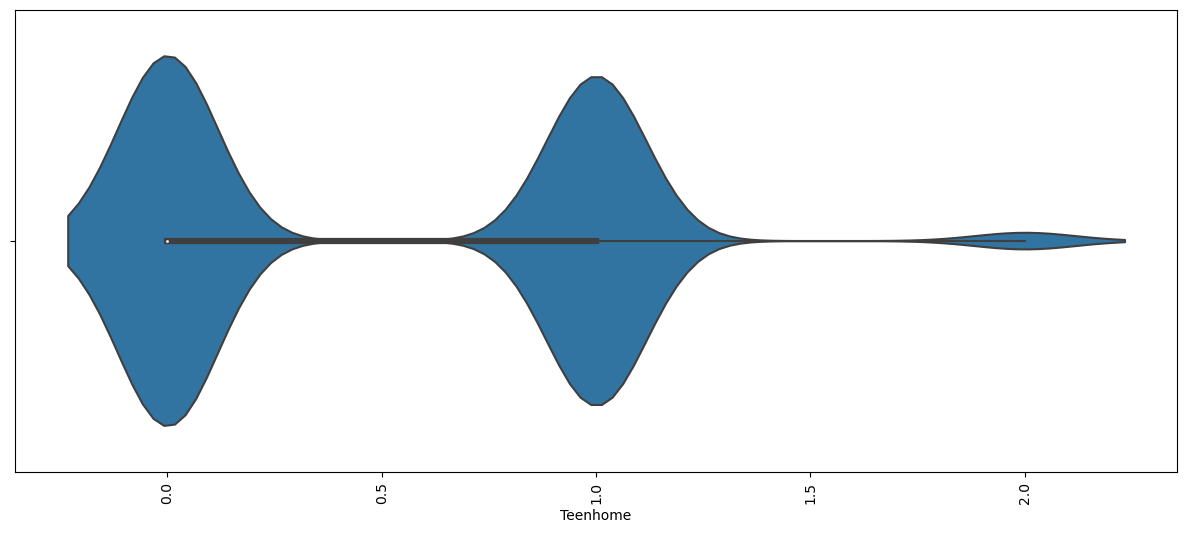

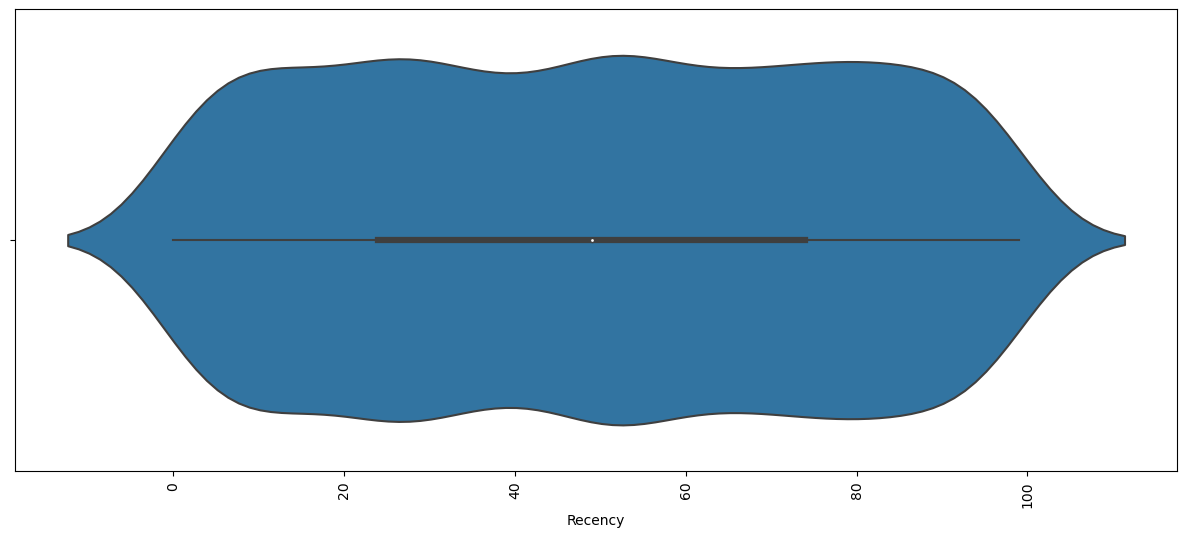

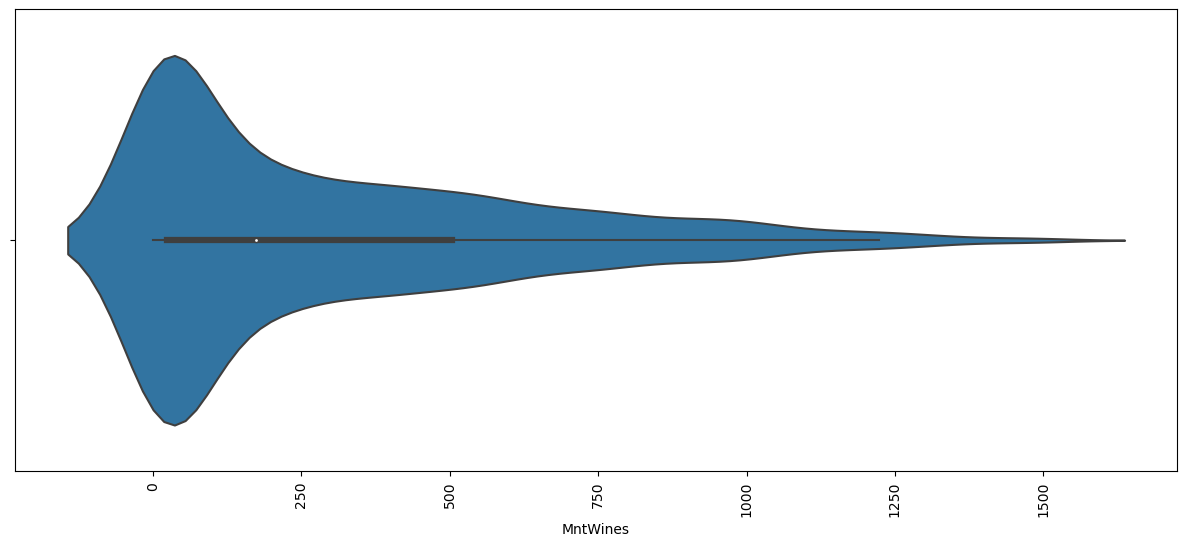

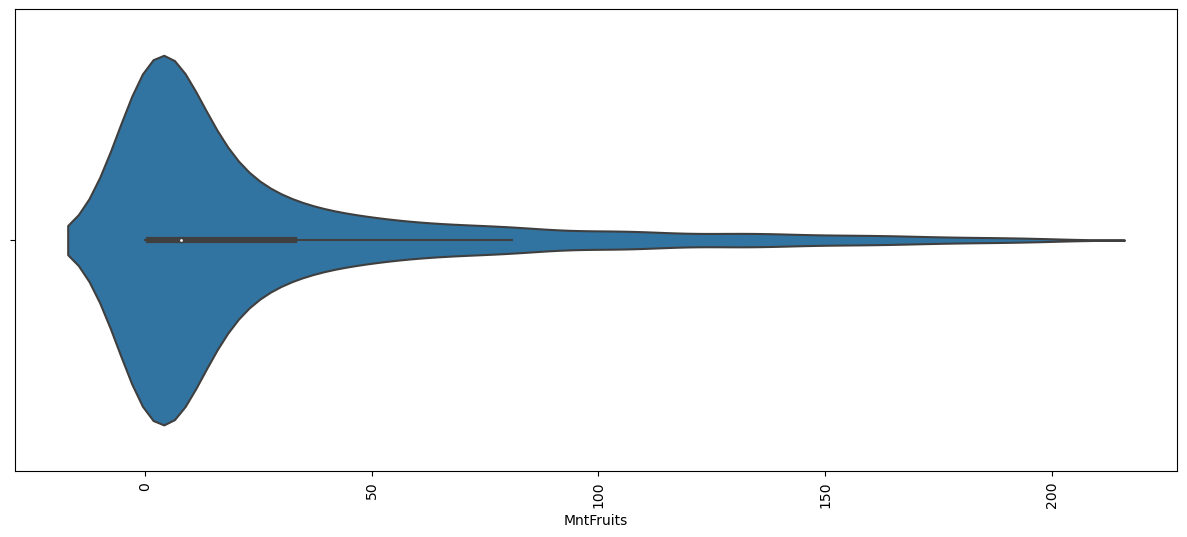

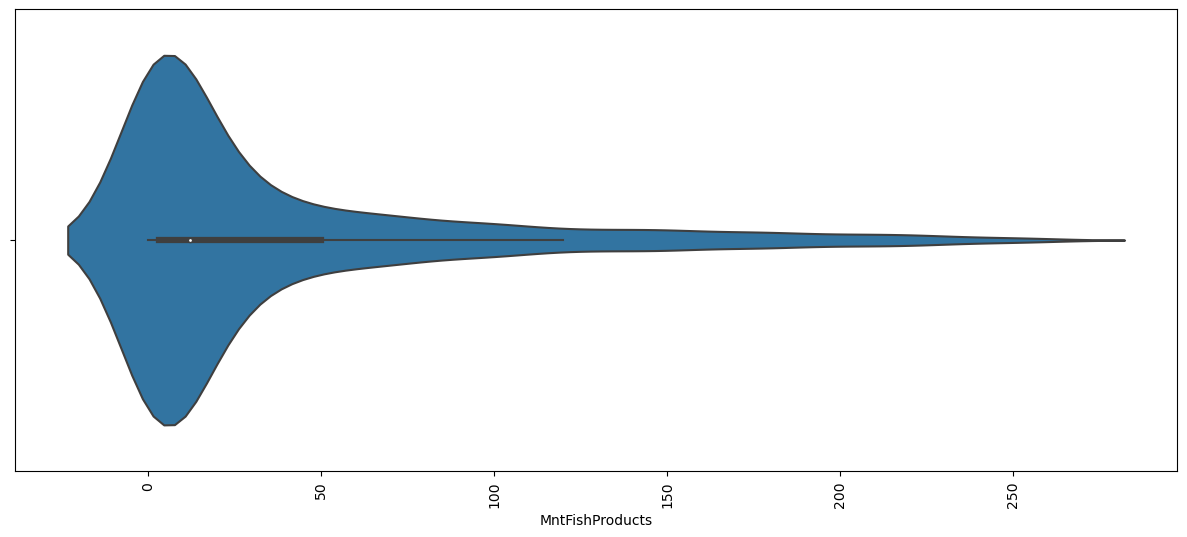

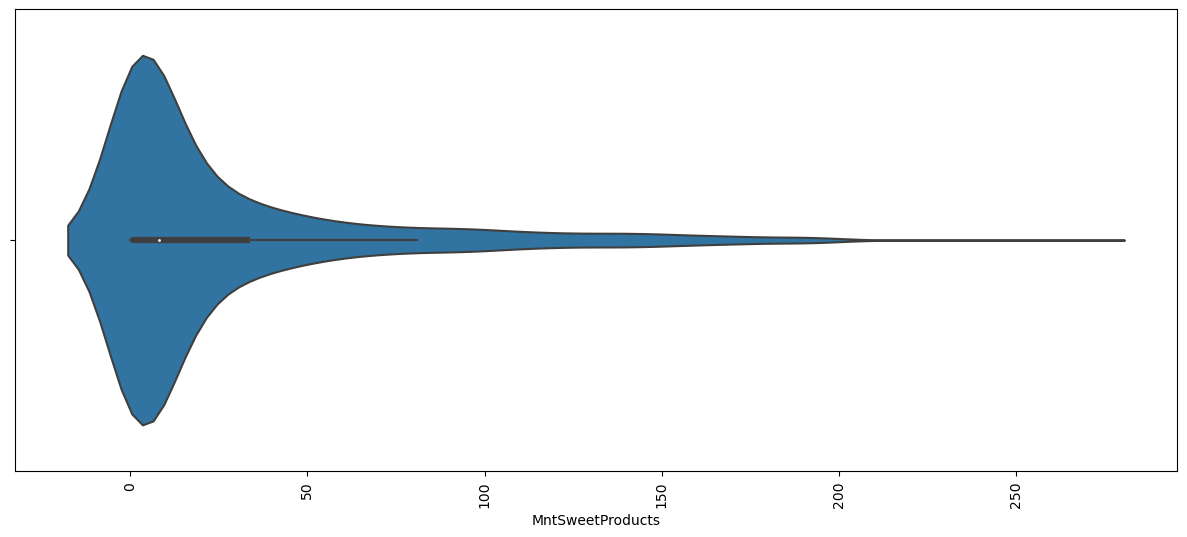

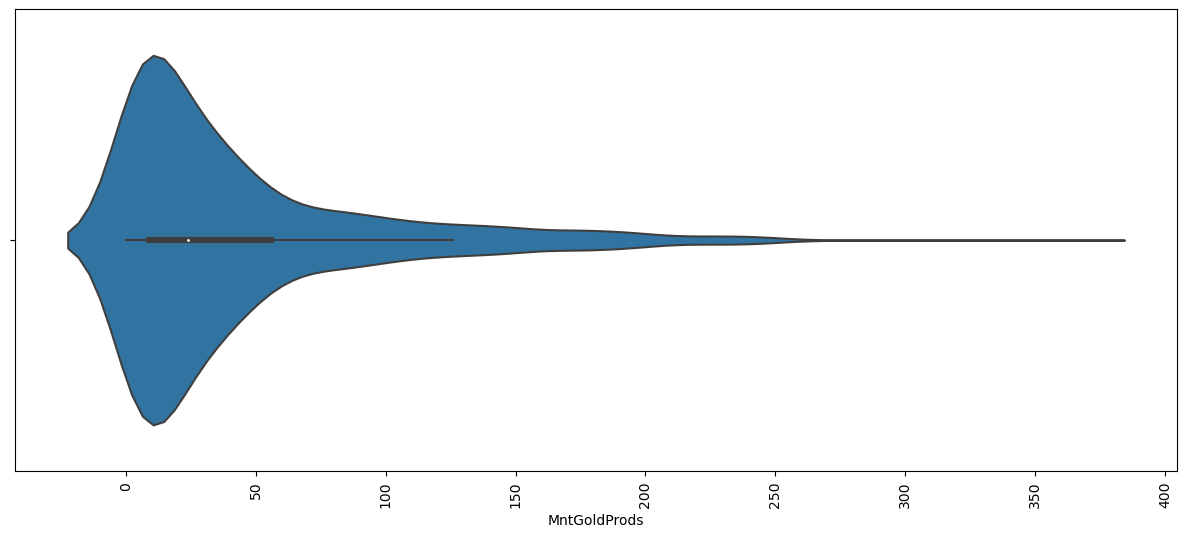

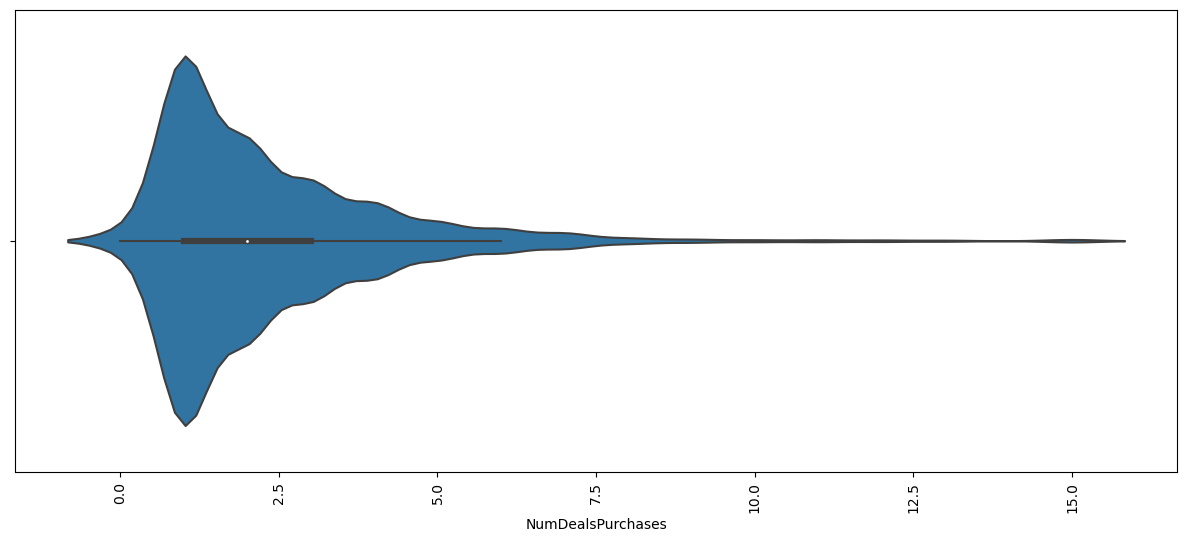

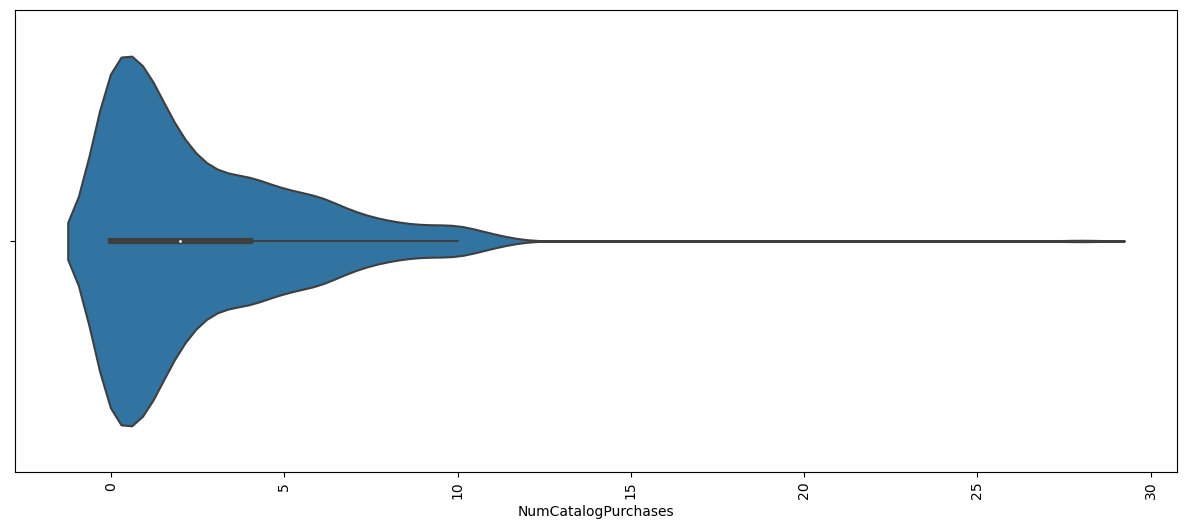

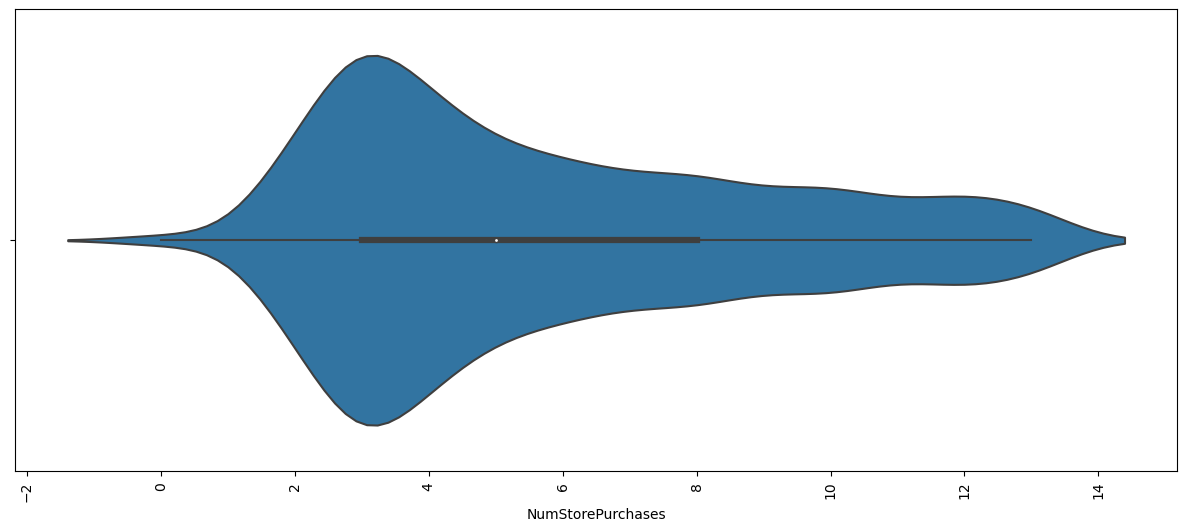

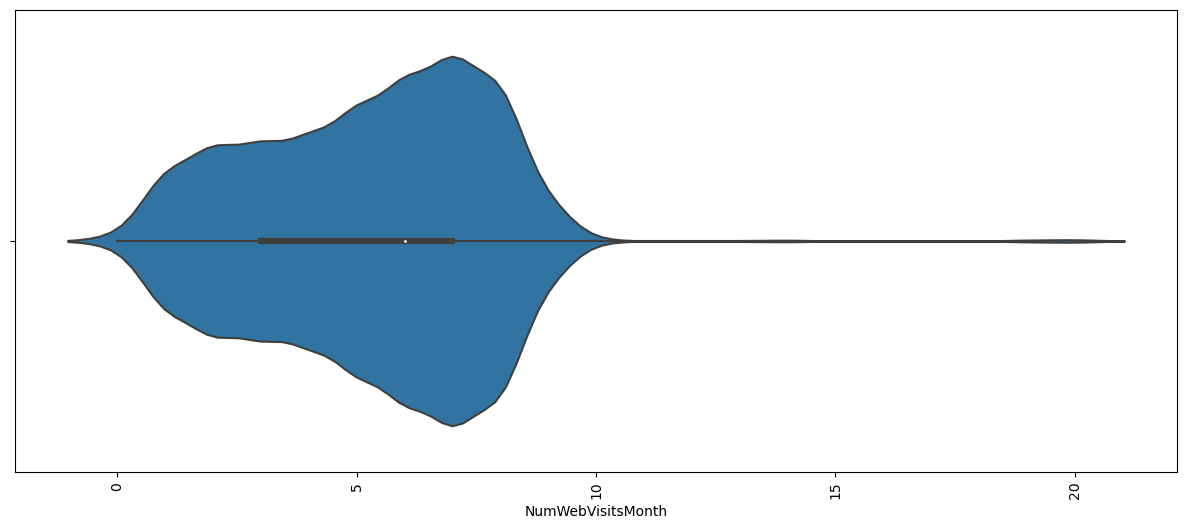

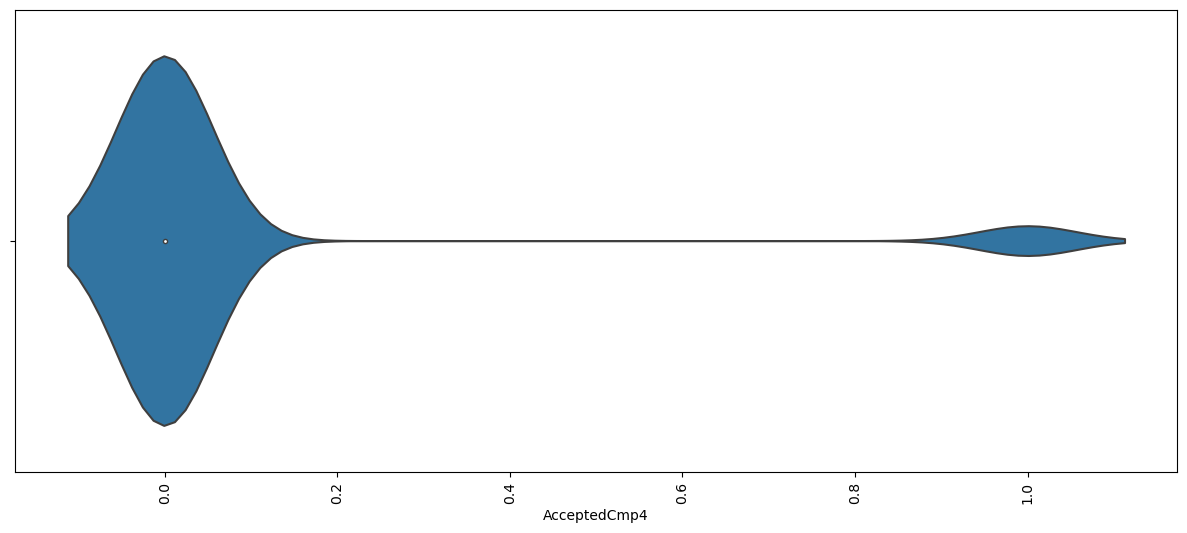

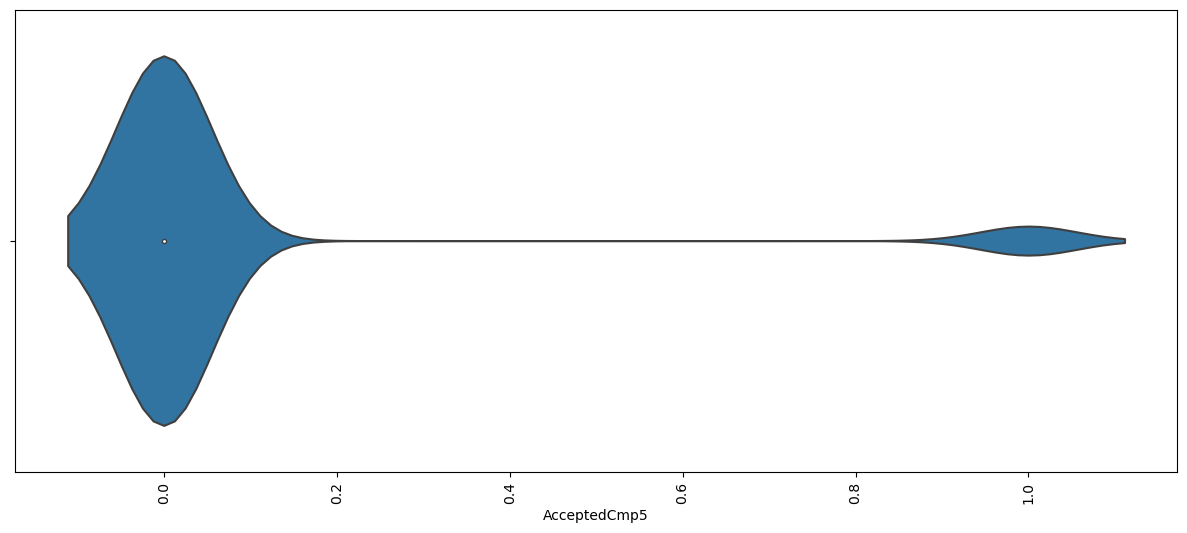

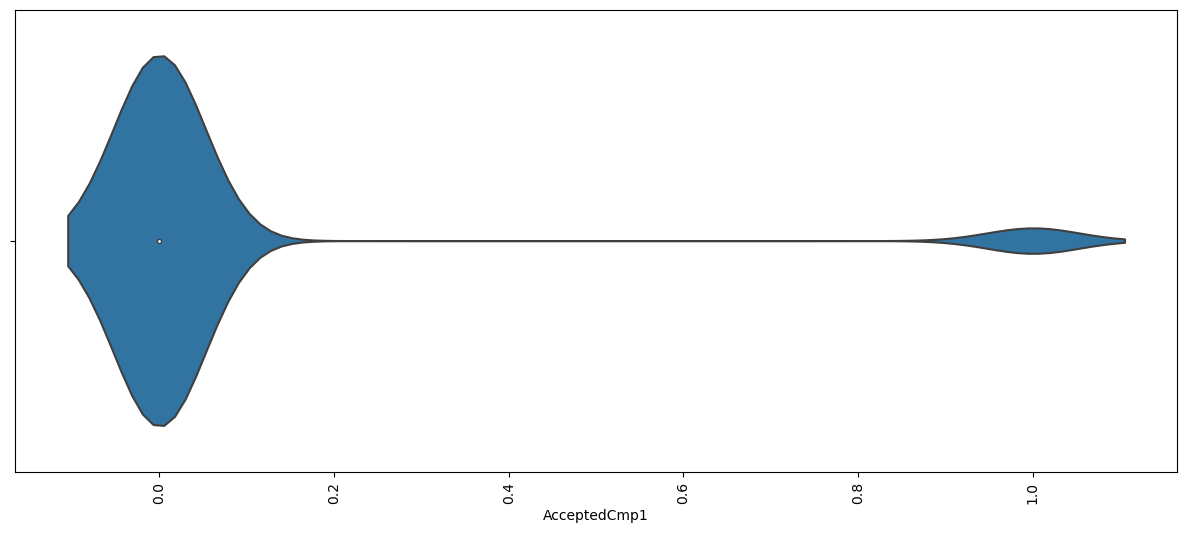

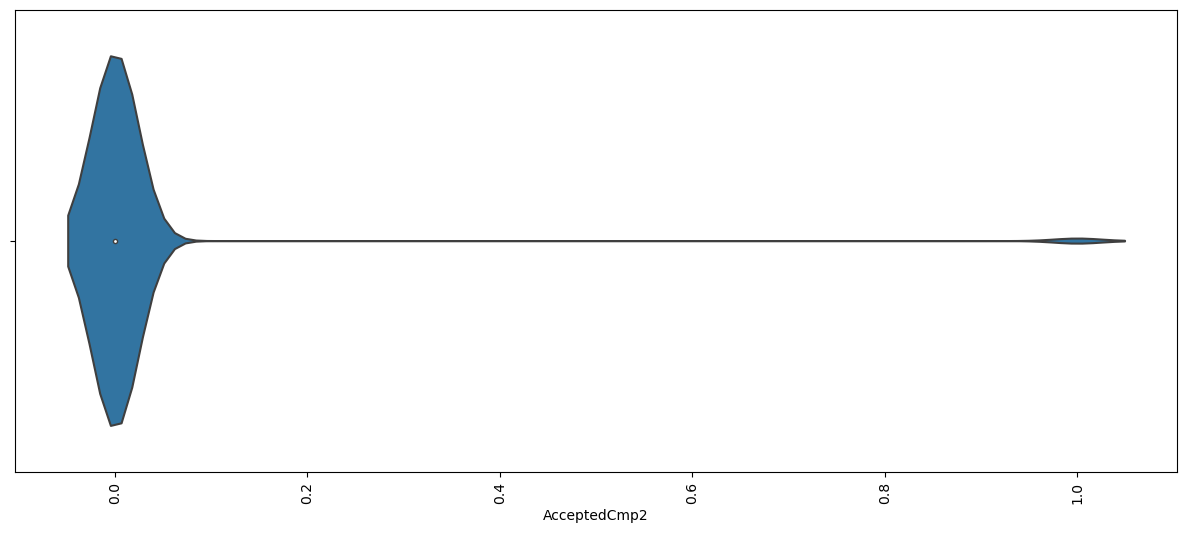

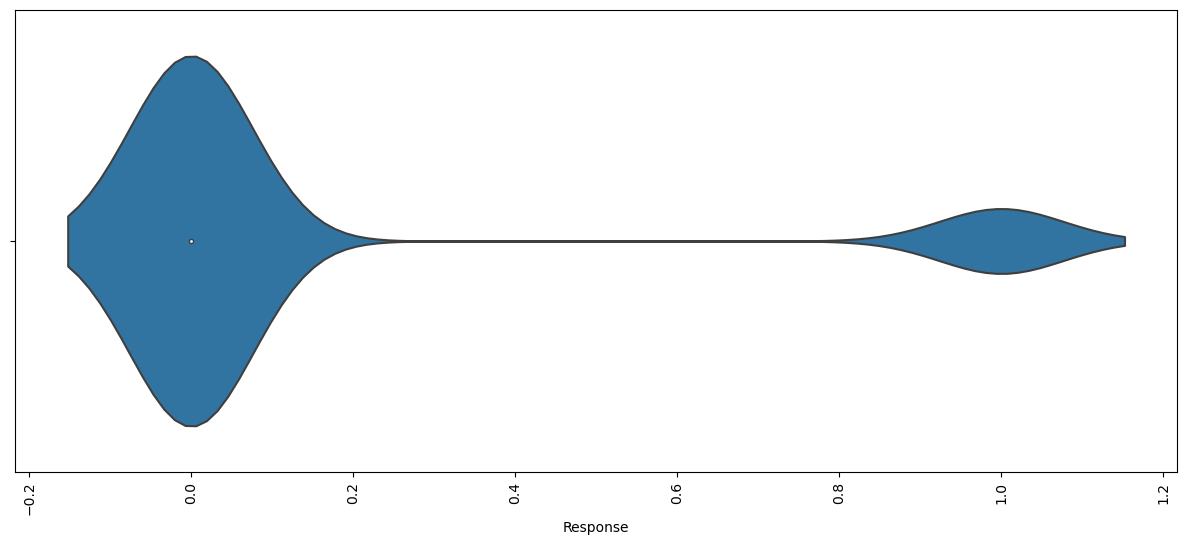

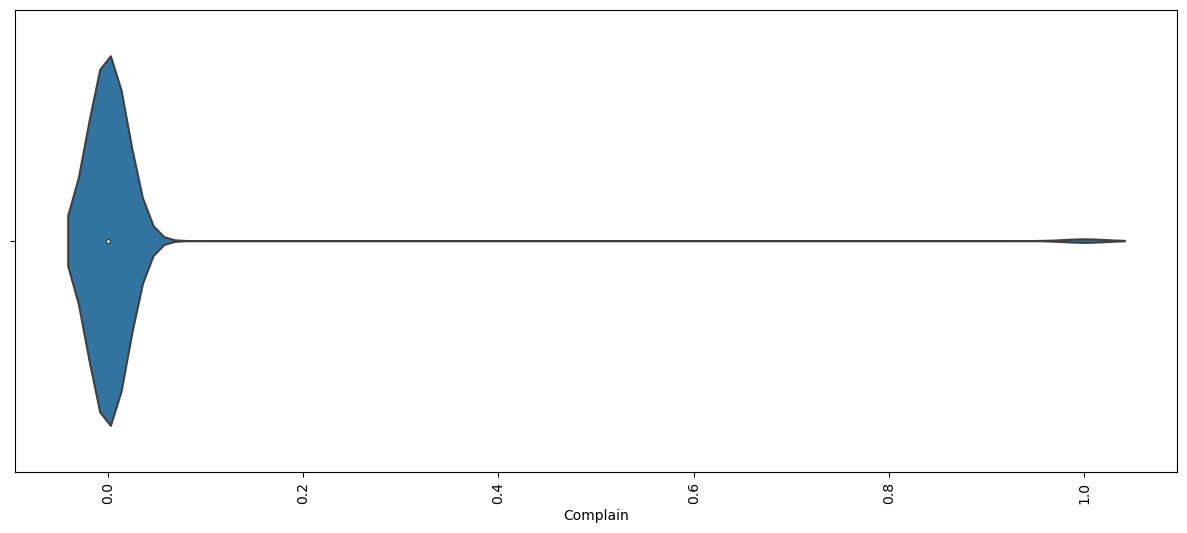

In [26]:
for i in data_num.columns:
    plt.figure(figsize=(15,6))
    sns.violinplot(data_num[i])
    plt.xticks(rotation=90)
    plt.show()

In [29]:
data.rename(columns={'Income': 'Income'}, inplace=True)
data['Income']=data["Income"].str.eplace("$", "")
data['Income']=data["Income"].str.replace(",", "")
data['Income']=data["Income"].astype(float)

KeyError: 'Income'

In [33]:
from datetime import date
data['Age'] = date.today().year - data['Year_Birth']

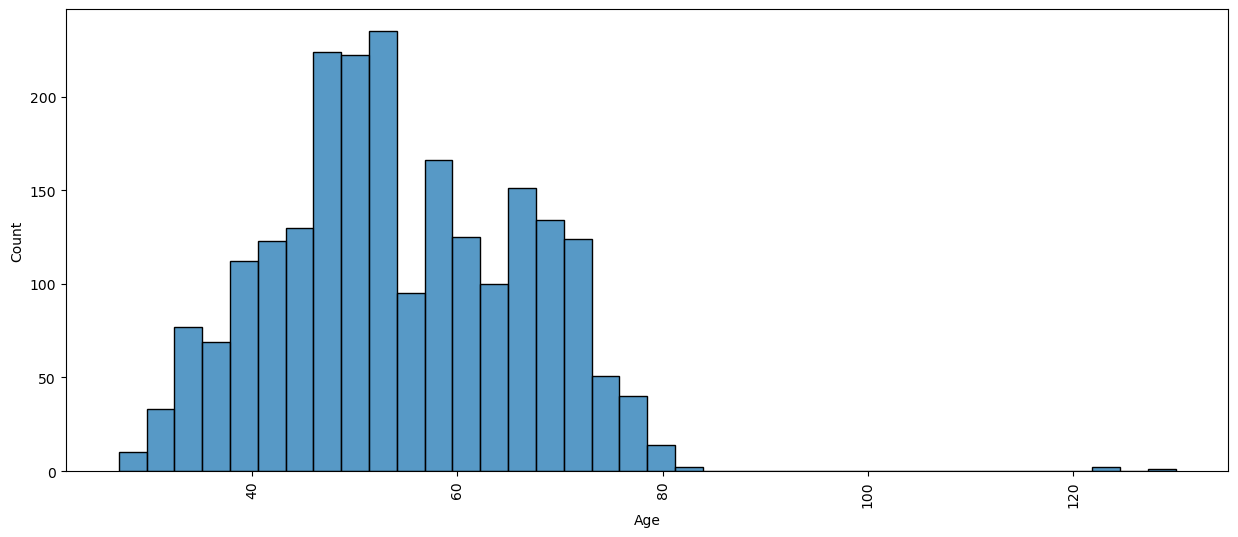

In [34]:
plt.figure(figsize=(15,6))
sns.histplot(x=data['Age'])
plt.xticks(rotation=90)
plt.show()

In [35]:
data2 = data[data['Age']>100]

In [36]:
data2

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age
513,11004,1893,2n Cycle,Single,"$60,182.00",0,1,5/17/14,23,8,...,4,0,0,0,0,0,0,0,SA,130
827,1150,1899,PhD,Together,"$83,532.00",0,0,9/26/13,36,755,...,1,0,0,1,0,0,0,0,SP,124
2233,7829,1900,2n Cycle,Divorced,"$36,640.00",1,0,9/26/13,99,15,...,5,0,0,0,0,0,0,1,IND,123


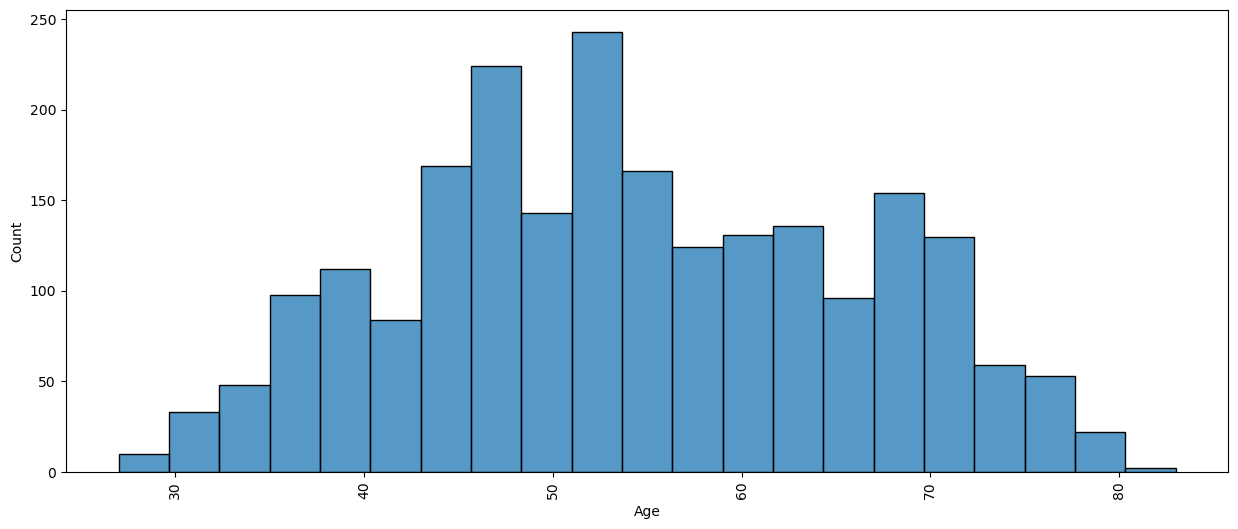

In [38]:
data = data[data['Age']<100]

plt.figure(figsize=(15,6))
sns.histplot(x=data['Age'])
plt.xticks(rotation=90)
plt.show()

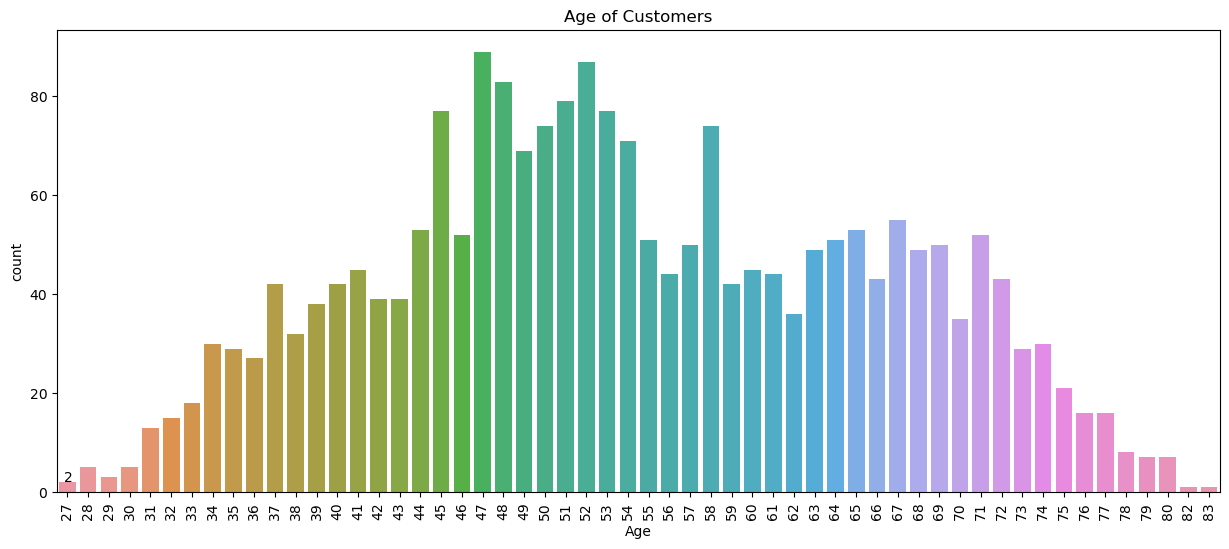

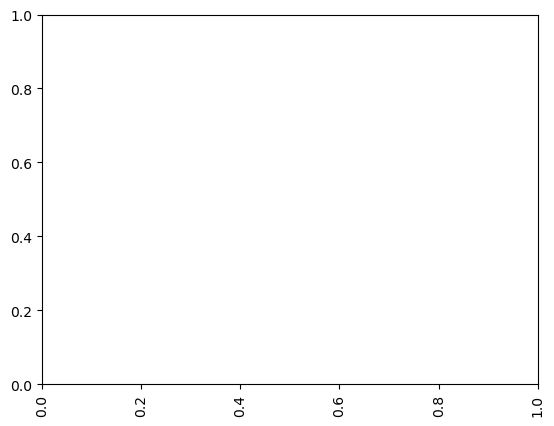

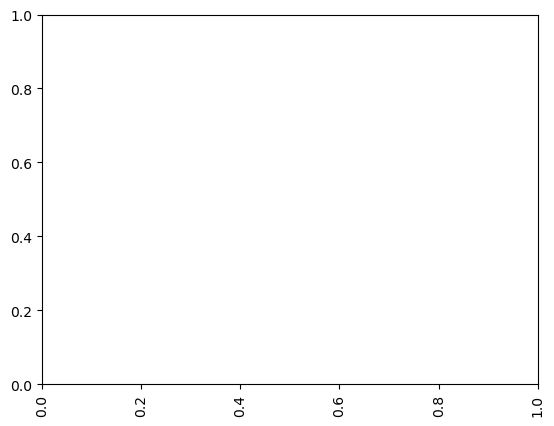

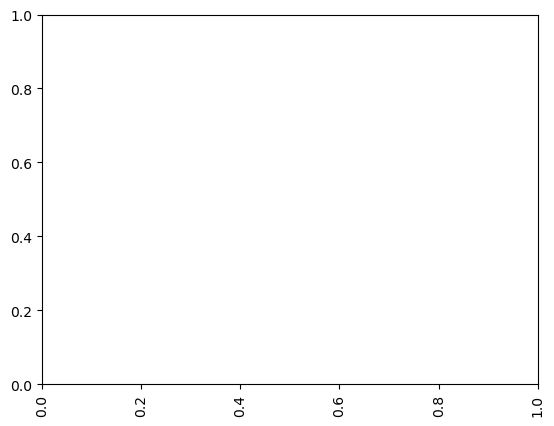

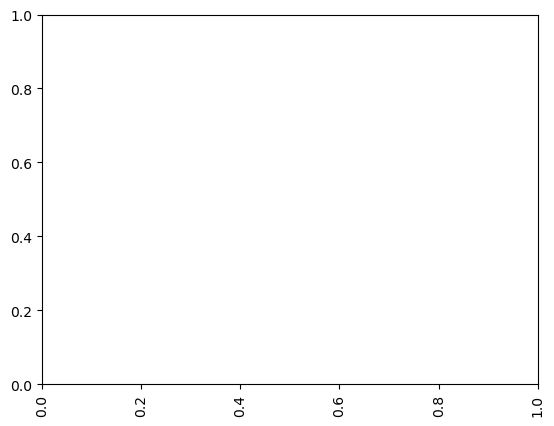

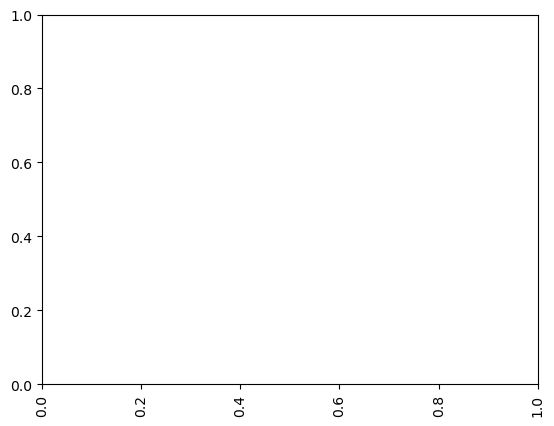

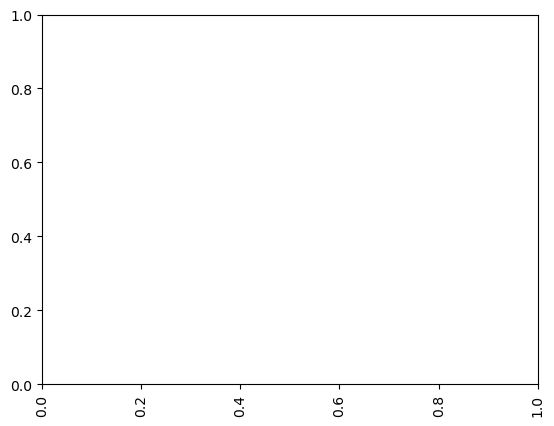

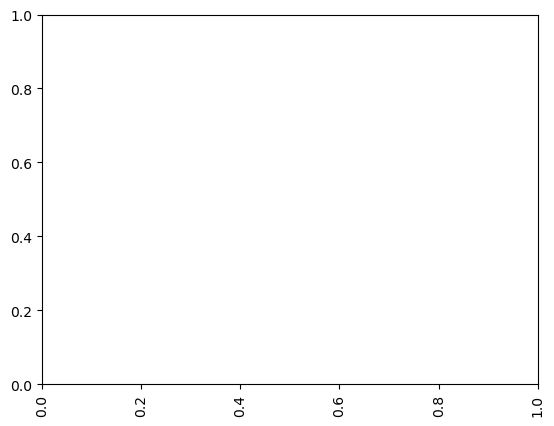

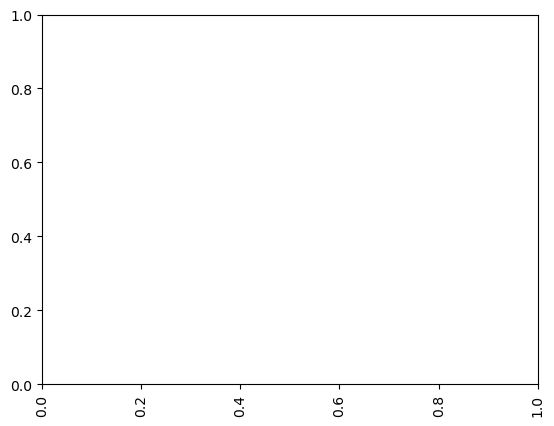

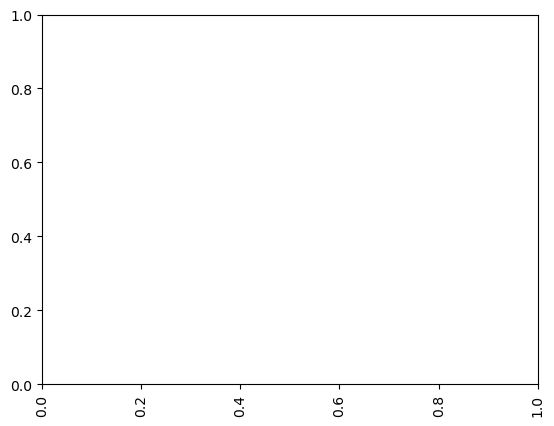

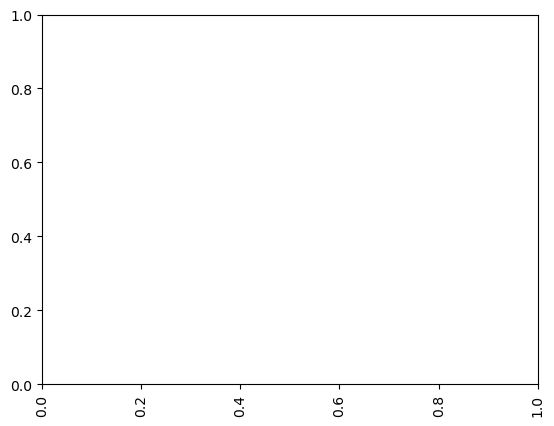

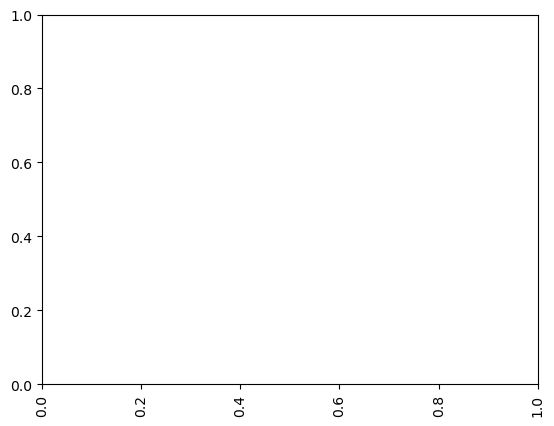

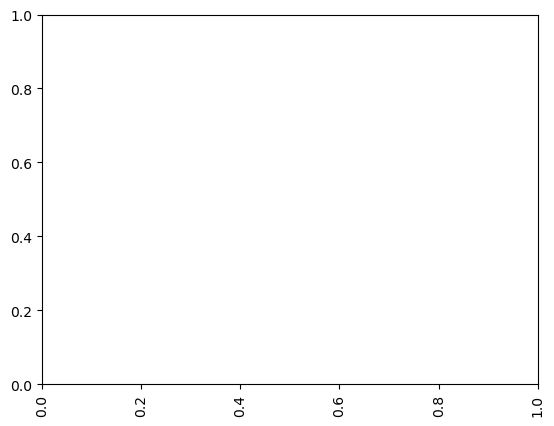

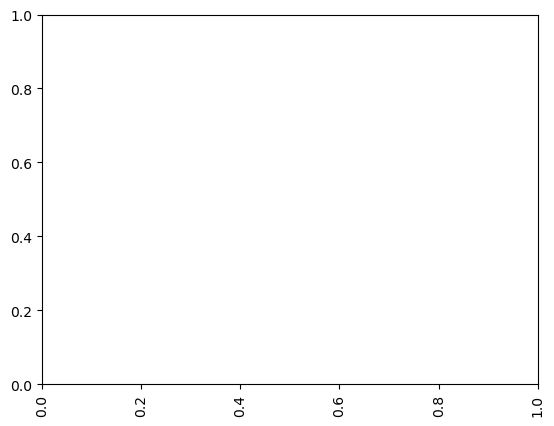

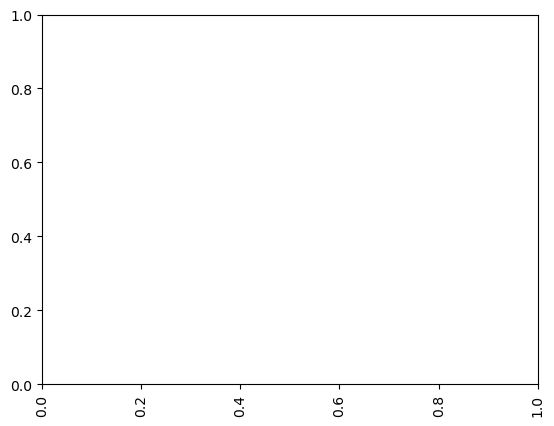

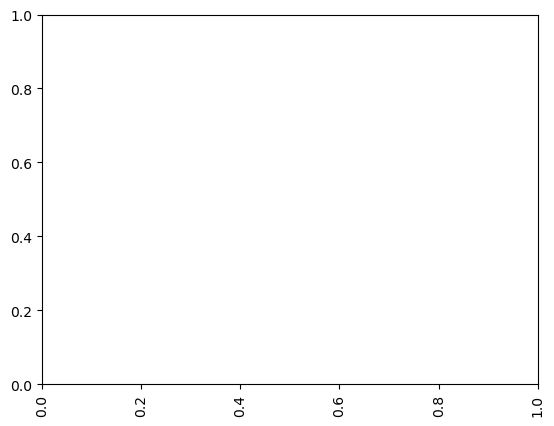

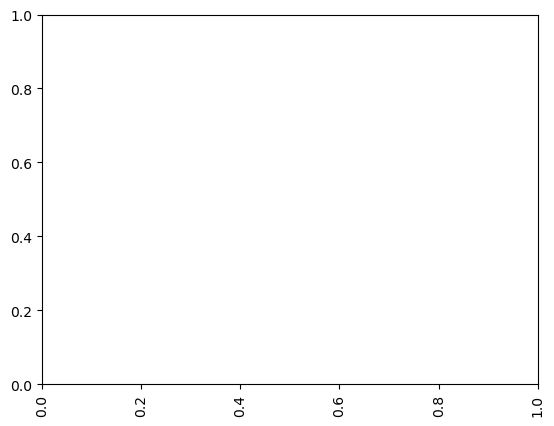

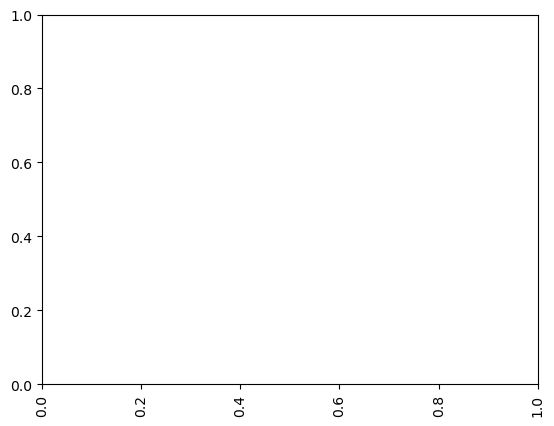

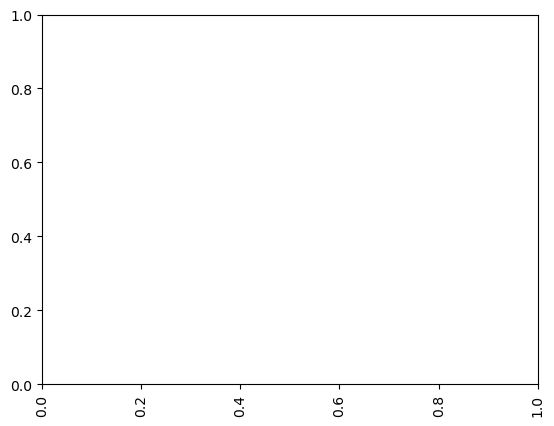

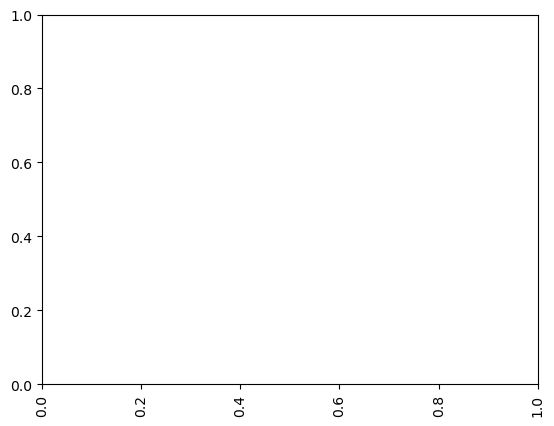

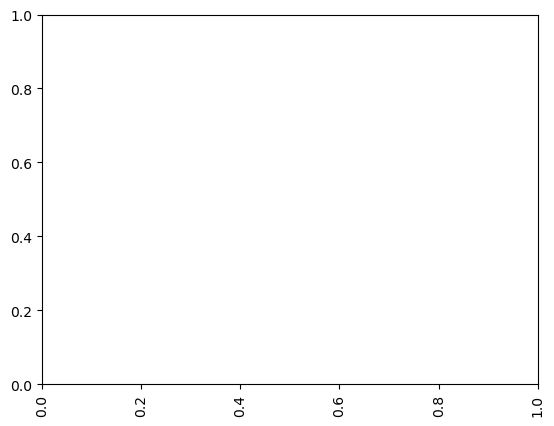

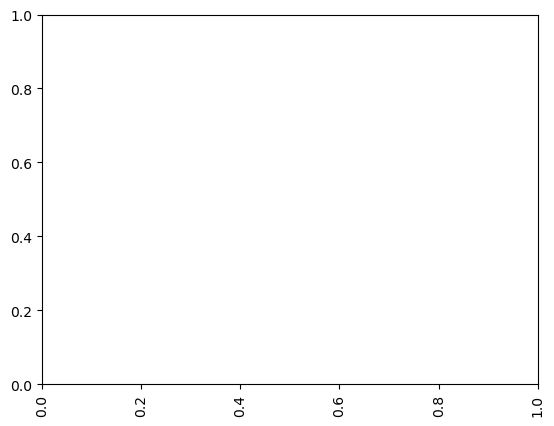

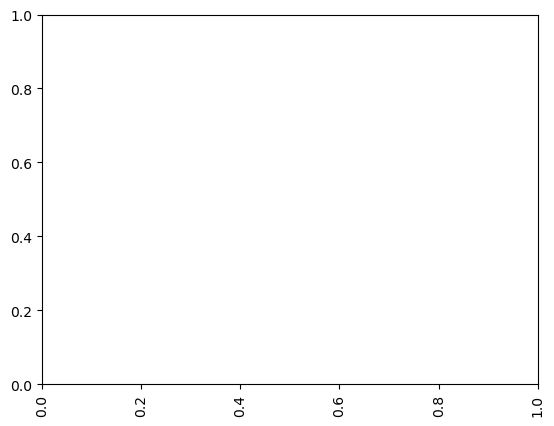

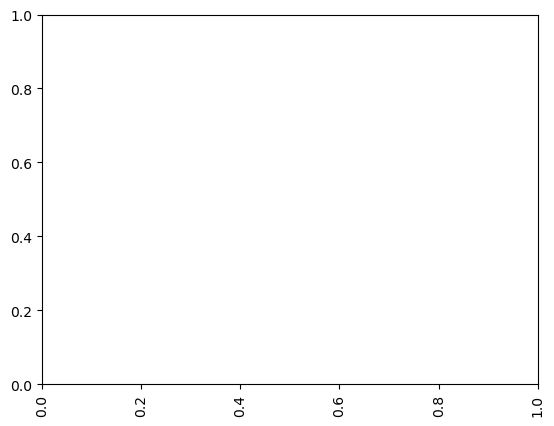

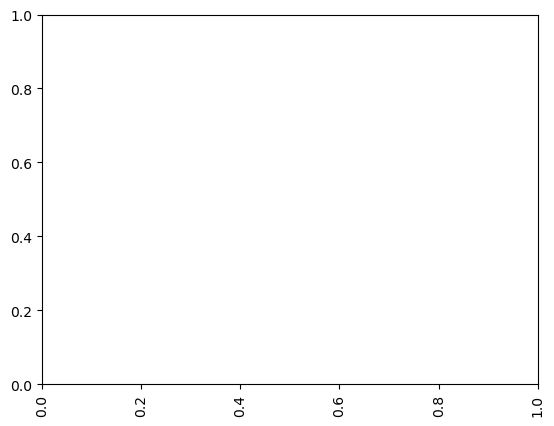

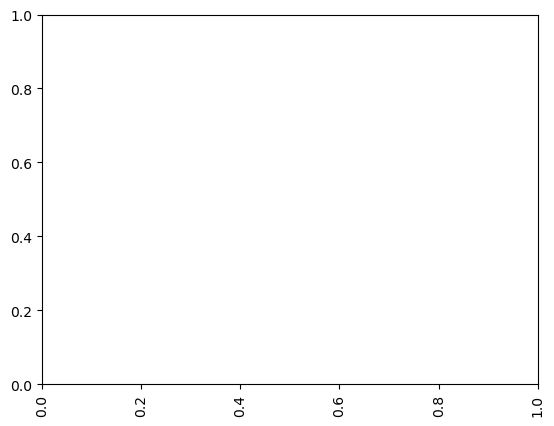

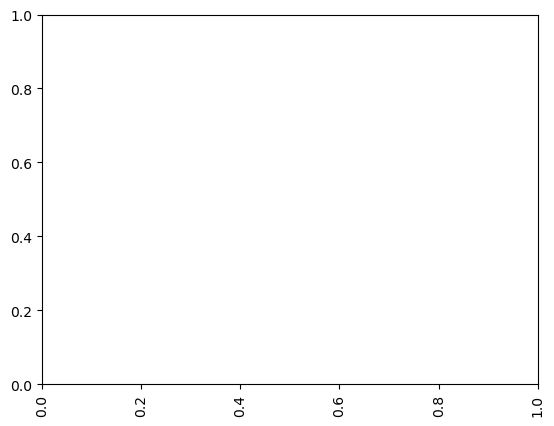

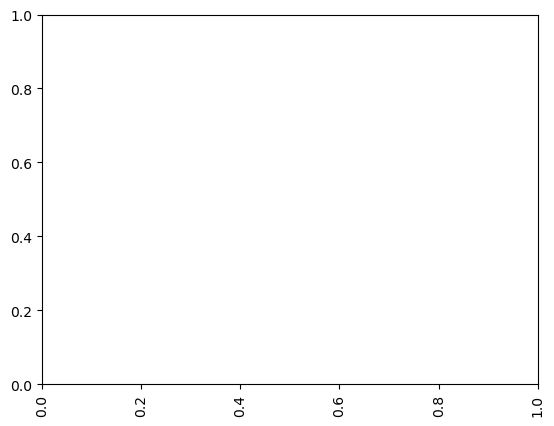

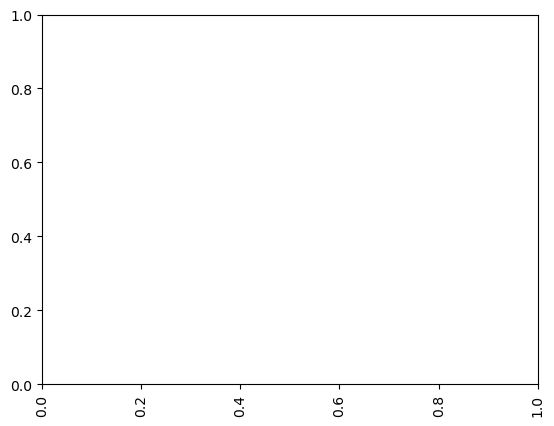

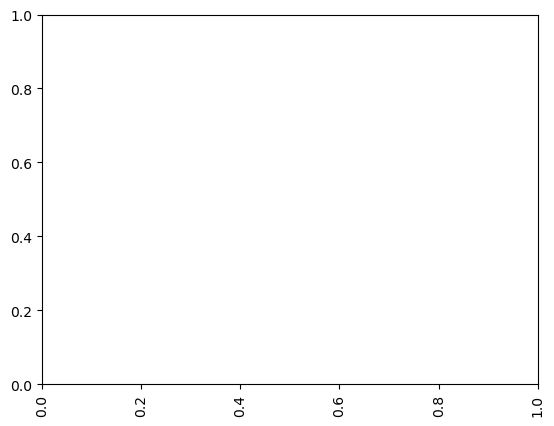

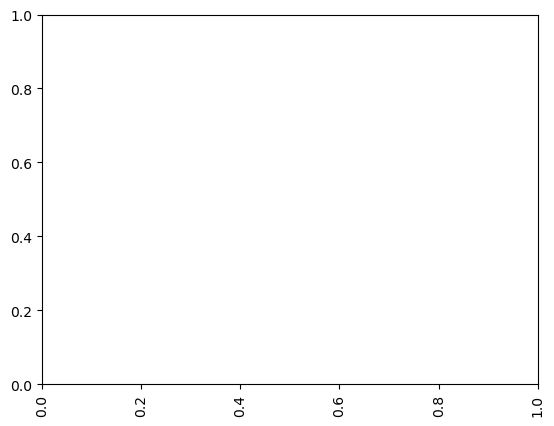

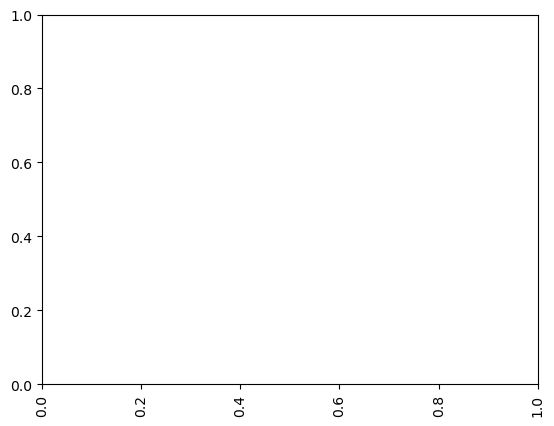

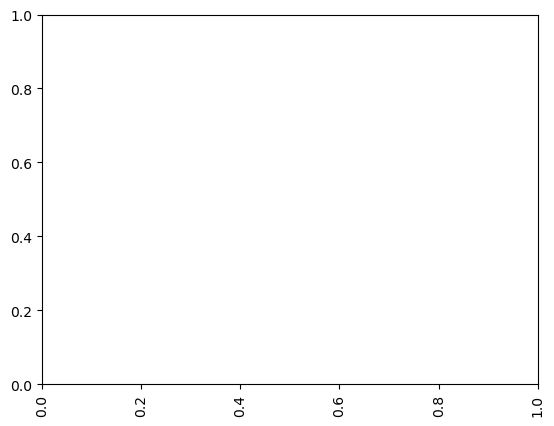

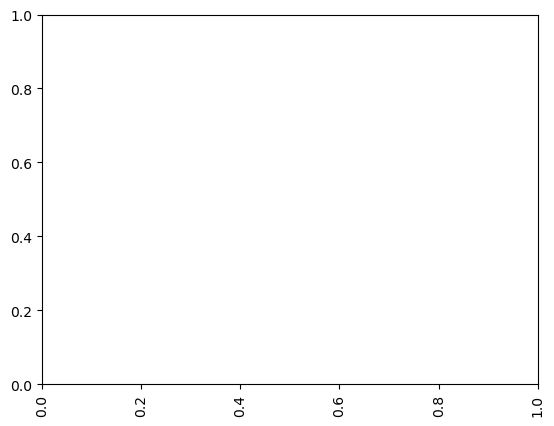

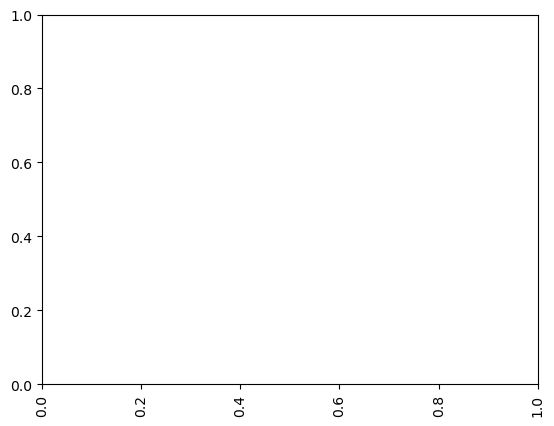

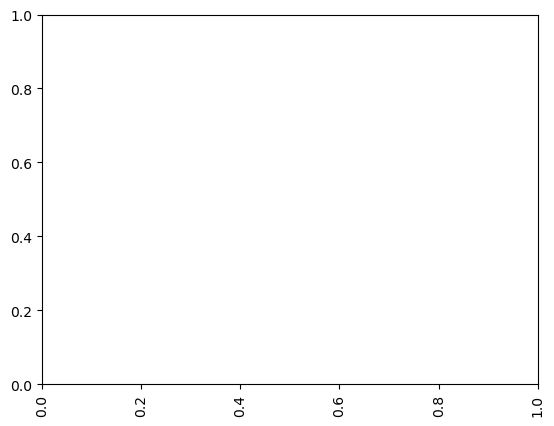

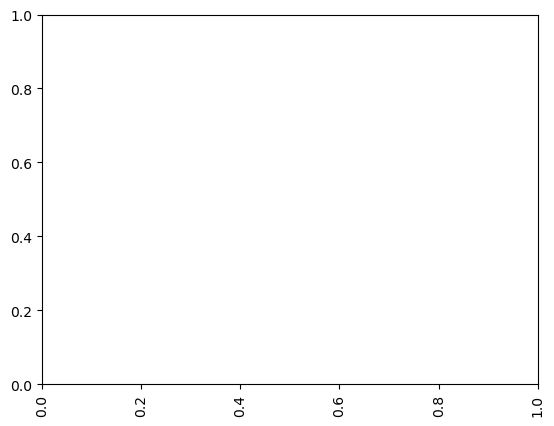

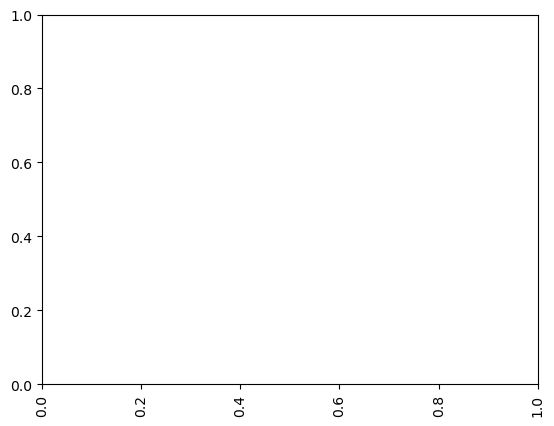

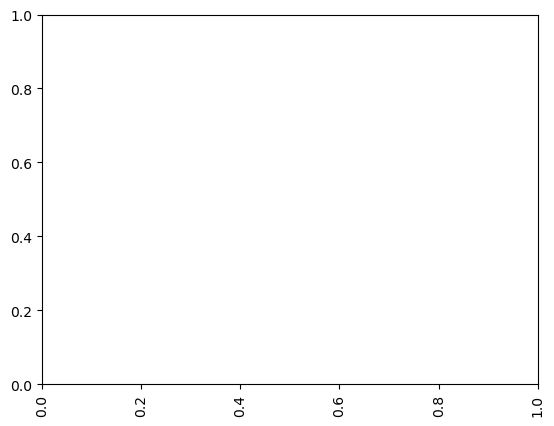

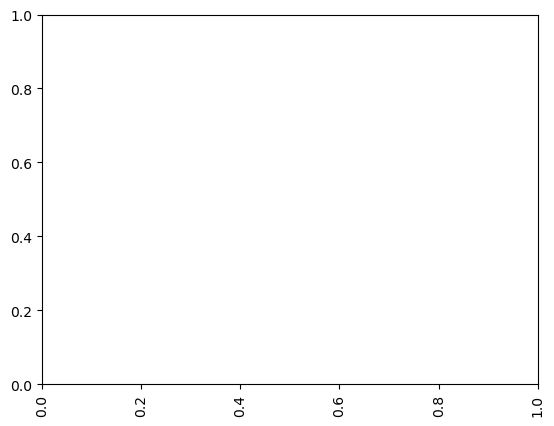

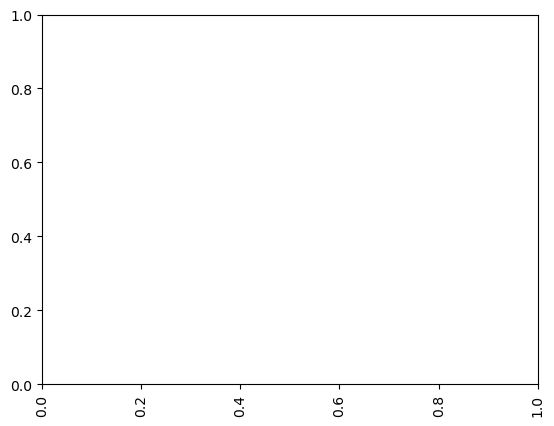

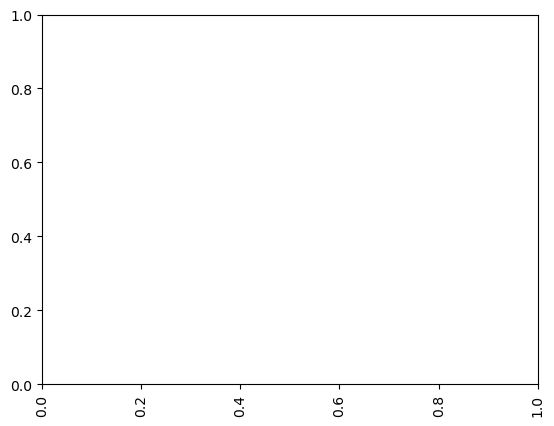

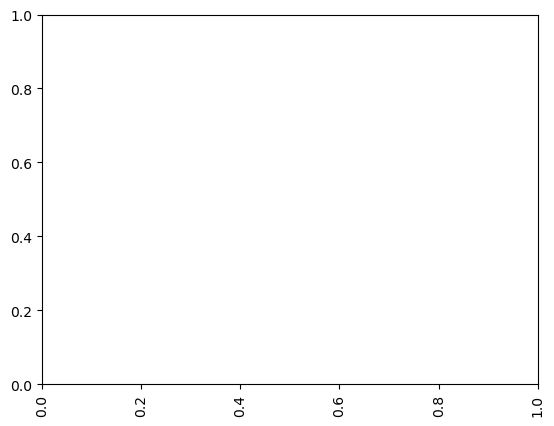

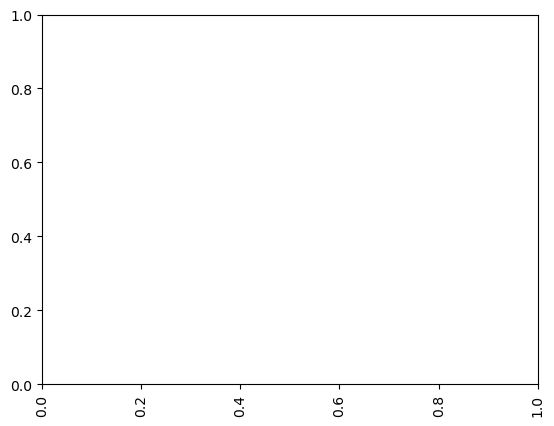

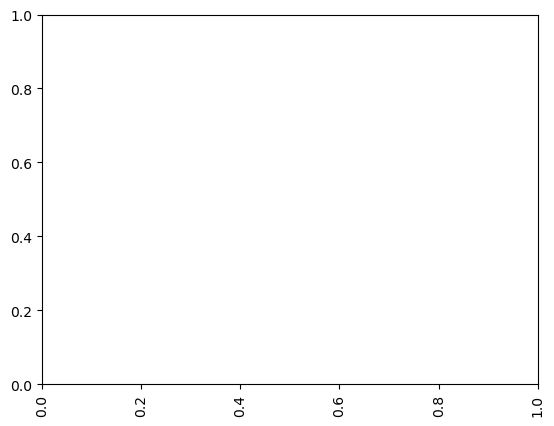

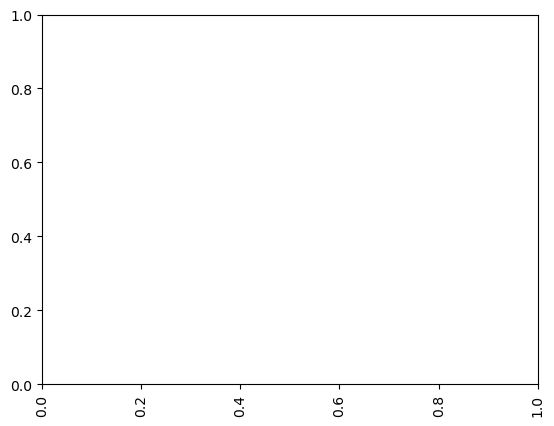

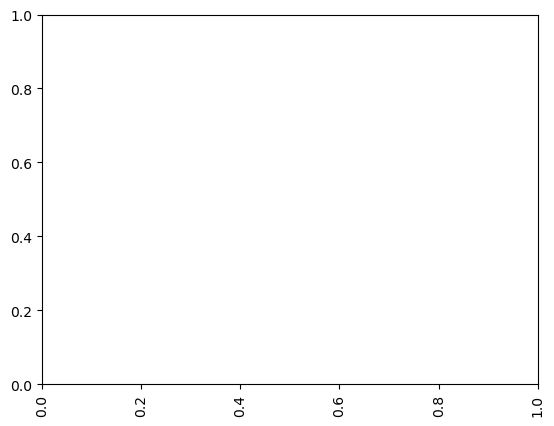

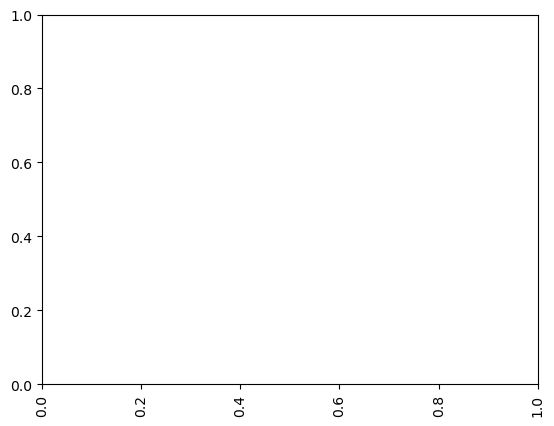

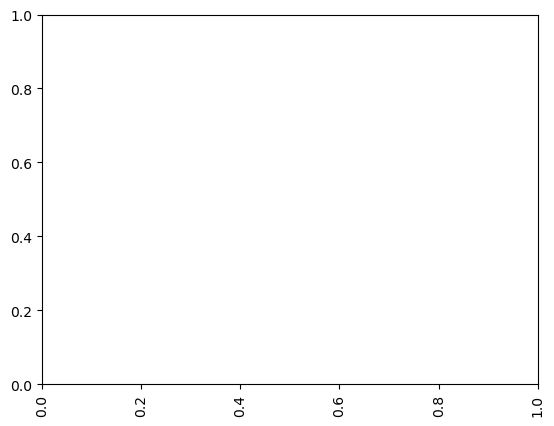

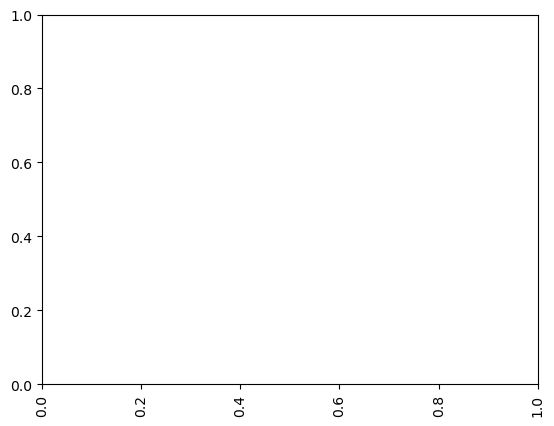

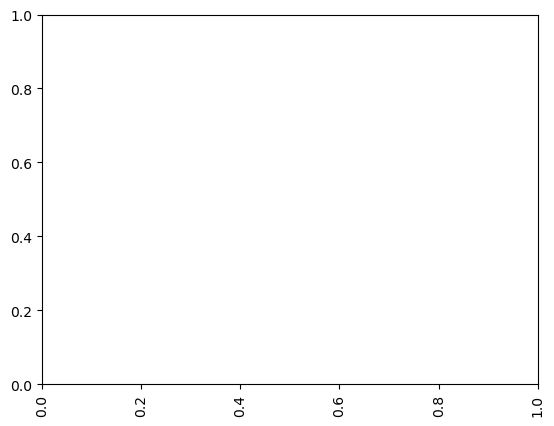

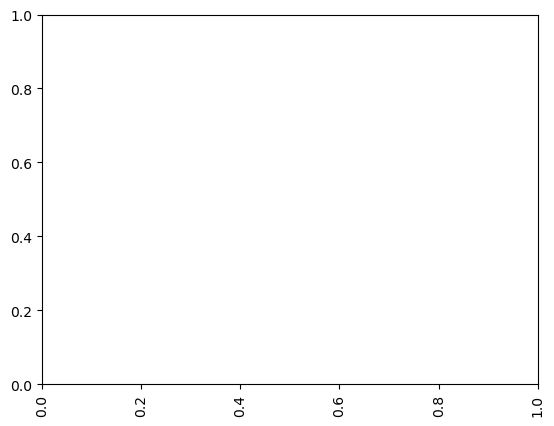

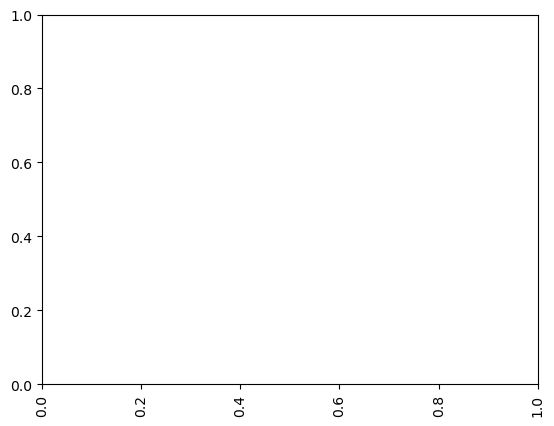

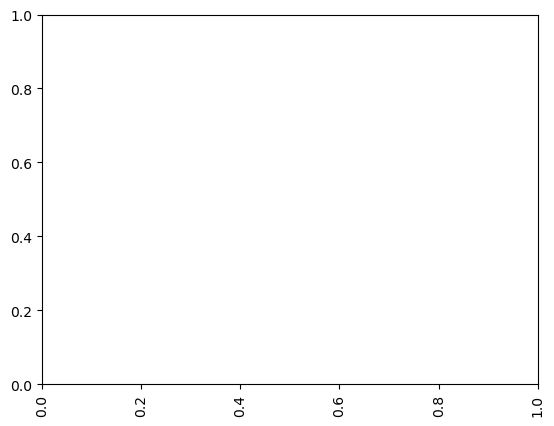

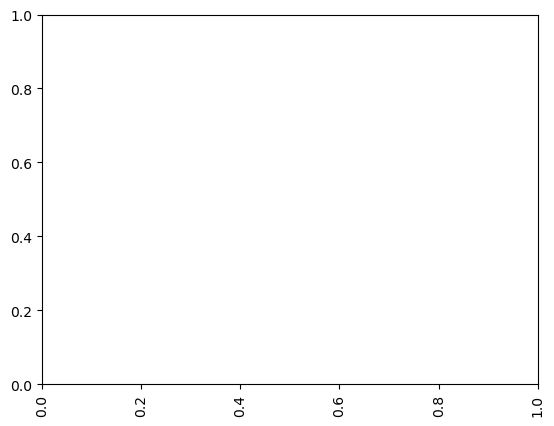

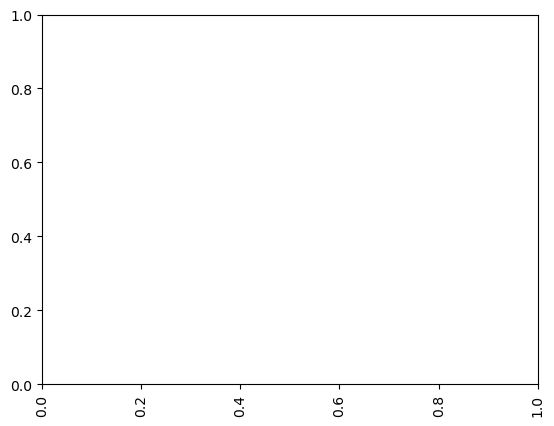

In [39]:
plt.figure(figsize=(15,6))
plt.title('Age of Customers')
ax = sns.countplot(x=data['Age']);
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    plt.xticks(rotation=90)
    plt.show()

In [40]:
data['Total Amount'] = data['MntWines']+ data['MntFruits']+data['MntMeatProducts']
data['Total Amount']

0        672
1        533
2        204
3         11
4         46
        ... 
2235     516
2236      28
2237     275
2238    1006
2239     746
Name: Total Amount, Length: 2237, dtype: int64

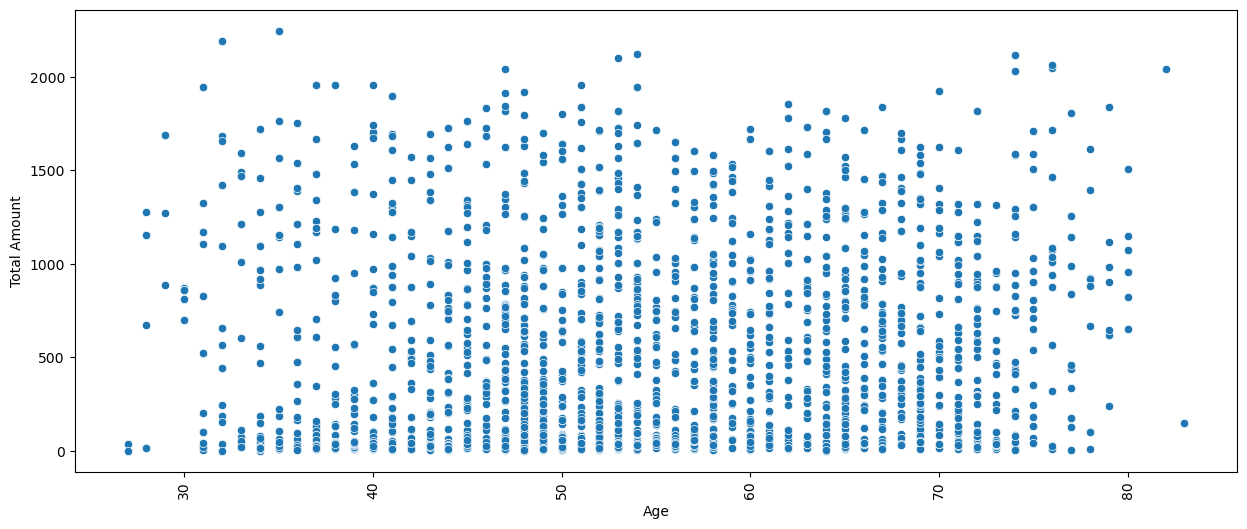

In [43]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x=data['Age'], y=data['Total Amount'])
plt.xticks(rotation=90)
plt.show()

In [44]:
data.filter(regex='Mnt', axis=1)

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,189,104,379,111,189,218
1,464,5,64,7,0,37
2,134,11,59,15,2,30
3,10,0,1,0,0,0
4,6,16,24,11,0,34
...,...,...,...,...,...,...
2235,372,18,126,47,48,78
2236,5,10,13,3,8,16
2237,185,2,88,15,5,14
2238,267,38,701,149,165,63


In [45]:
data['PercentWine']= (data['MntWines']/data['Total Amount'])*100

In [46]:
data['PercentOthers']= ((data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']))

In [47]:
data.filter(regex='Percent|Total|MntWines', axis=1)

,MntWines,Total Amount,PercentWine,PercentOthers
0,189,672,28.125000,594
1,464,533,87.054409,76
2,134,204,65.686275,85
3,10,11,90.909091,1
4,6,46,13.043478,51
...,...,...,...,...
2235,372,516,72.093023,191
2236,5,28,17.857143,26
2237,185,275,67.272727,105
2238,267,1006,26.540755,888


In [51]:
data['Total_Purchase']=data['NumWebPurchases']+data['NumCatalogPurchases']+data['NumStorePurchases']+data['NumWebVisitsMonth']

In [48]:
data.filter(regex='Num', axis=1)

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,1,4,4,6,1
1,1,7,3,7,5
2,1,3,2,5,2
3,1,1,0,2,7
4,2,3,1,2,7
...,...,...,...,...,...
2235,2,5,2,11,4
2236,1,1,0,3,8
2237,2,6,1,5,8
2238,1,5,4,10,3


In [54]:
data['Total_Purchase']

0       15
1       22
2       12
3       10
4       13
        ..
2235    22
2236    12
2237    20
2238    22
2239    24
Name: Total_Purchase, Length: 2237, dtype: int64

In [55]:
data.filter(regex='WebP|Catalog|Store|Total_Purchase', axis=1)

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Total_Purchase
0,4,4,6,15
1,7,3,7,22
2,3,2,5,12
3,1,0,2,10
4,3,1,2,13
...,...,...,...,...
2235,5,2,11,22
2236,1,0,3,12
2237,6,1,5,20
2238,5,4,10,22
